In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fast_ml.feature_selection import get_constant_features
from sklearn.model_selection import train_test_split

# Task 1

Task one will focus on combining our individual datasets, getting the combined dataset cleaned, and then preparing the data for the ensuing machine learning tasks. To this end, we will be implementing a train-test split, and then looking for potential correlations in the training set between various continuous/categorical features, and the target death_yn feature. 

In [6]:
#Combining the two datasets and saving as a new csv
df1 = pd.read_csv('covid19-cdc-22207000.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
df2 = pd.read_csv('covid19-cdc-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

combined_df = pd.concat([df1, df2])

combined_df.to_csv('covid19-cdc-combined-22207000-12468998.csv', index=False)

In [7]:
#Reading the new CSV and checking length
df = pd.read_csv('covid19-cdc-combined-22207000-12468998.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

print(len(df))

40000


# Data Cleaning

In [8]:
#condensing missing data into "Missing" for categorical features
for item in ['case_month', 'res_state','state_fips_code', 'res_county','county_fips_code', 'age_group','sex','race','ethnicity','current_status','symptom_status','hosp_yn','death_yn']:
    df[item] = df[item].replace(np.nan, "Missing")

In [9]:
#adjusting state and county fips code datatypes to categorical, due to finite nature
df["state_fips_code"] = df["state_fips_code"].astype(object)
df["county_fips_code"] = df["county_fips_code"].astype(object)

In [10]:
#checking for duplicate rows
i = 0
for item in df.duplicated(keep=False):
    if item == True:
        print(df.loc[[i]])
    i+=1
    
#There are a fair few duplicate rows in this dataset, though ultimately they are only a small subset of the overall data.
#Becuase the data is not sorted by unique identifiers and consists only of information about each case, these duplicates are
#likely due to similar cirucmstances, rather than errors in data. Furthermore, the large amount of missing data significantly raises the chances of duplicates occuring.
#Therefor, the duplicates will not be deleted

  case_month res_state state_fips_code res_county county_fips_code  age_group  \
0    2022-01        MO            29.0    Missing          Missing  65+ years   

      sex   race            ethnicity  case_positive_specimen_interval  \
0  Female  White  Non-Hispanic/Latino                              0.0   

   case_onset_interval  process exposure_yn             current_status  \
0                  NaN  Missing     Missing  Laboratory-confirmed case   

  symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
0        Missing  Unknown  Missing      Yes                      NaN  
  case_month res_state state_fips_code res_county county_fips_code  age_group  \
2    2020-03        NY            36.0     QUEENS          36081.0  65+ years   

    sex   race            ethnicity  case_positive_specimen_interval  \
2  Male  Black  Non-Hispanic/Latino                              0.0   

   case_onset_interval  process exposure_yn             current_status  \
2              

   case_month res_state state_fips_code         res_county county_fips_code  \
78    2022-01        VA            51.0  NEWPORT NEWS CITY          51700.0   

    age_group     sex   race            ethnicity  \
78  65+ years  Female  White  Non-Hispanic/Latino   

    case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
78                              NaN                  NaN  Missing     Missing   

               current_status symptom_status  hosp_yn   icu_yn death_yn  \
78  Laboratory-confirmed case        Missing  Missing  Missing      Yes   

   underlying_conditions_yn  
78                      NaN  
   case_month res_state state_fips_code   res_county county_fips_code  \
80    2022-01        CA             6.0  LOS ANGELES           6037.0   

    age_group   sex   race        ethnicity  case_positive_specimen_interval  \
80  65+ years  Male  White  Hispanic/Latino                              NaN   

    case_onset_interval  process exposure_yn        

    case_month res_state state_fips_code res_county county_fips_code  \
166    2020-04        NJ            34.0     BERGEN          34003.0   

     age_group     sex   race            ethnicity  \
166  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
166                              NaN                  0.0  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
166     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

    death_yn underlying_conditions_yn  
166      Yes                      NaN  
    case_month res_state state_fips_code res_county county_fips_code  \
173    2020-04        NY            36.0      BRONX          36005.0   

     age_group   sex     race ethnicity  case_positive_specimen_interval  \
173  65+ years  Male  Missing   Missing                              0.0   

     case_onset_interval  process exposure_yn             current_stat

    case_month res_state state_fips_code res_county county_fips_code  \
236    2022-01        NY            36.0   RICHMOND          36085.0   

     age_group     sex   race            ethnicity  \
236  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
236                              0.0                  NaN  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
236     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

    death_yn underlying_conditions_yn  
236      Yes                      Yes  
    case_month res_state state_fips_code res_county county_fips_code  \
238    2020-04        NJ            34.0    Missing          Missing   

     age_group     sex   race            ethnicity  \
238  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
238                              NaN        

    case_month res_state state_fips_code res_county county_fips_code  \
279    2021-03        IL            17.0       COOK          17031.0   

          age_group   sex   race        ethnicity  \
279  18 to 49 years  Male  White  Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
279                              1.0                  0.0  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
279     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

    death_yn underlying_conditions_yn  
279      Yes                      NaN  
    case_month res_state state_fips_code   res_county county_fips_code  \
280    2020-12        CA             6.0  LOS ANGELES           6037.0   

          age_group   sex   race        ethnicity  \
280  50 to 64 years  Male  White  Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
280                              NaN        

    case_month res_state state_fips_code res_county county_fips_code  \
330    2022-01        NV            32.0      CLARK          32003.0   

     age_group   sex   race            ethnicity  \
330  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  \
330                              0.0                  0.0   

                  process exposure_yn             current_status  \
330  Routine surveillance     Missing  Laboratory-confirmed case   

    symptom_status hosp_yn icu_yn death_yn underlying_conditions_yn  
330    Symptomatic     Yes    Yes      Yes                      Yes  
    case_month res_state state_fips_code res_county county_fips_code  \
332    2021-12        IL            17.0       COOK          17031.0   

     age_group     sex   race        ethnicity  \
332  65+ years  Female  White  Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
332                              1

    case_month res_state state_fips_code    res_county county_fips_code  \
404    2022-01        FL            12.0  HILLSBOROUGH          12057.0   

     age_group   sex   race            ethnicity  \
404  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
404                              0.0                  NaN  Missing   

    exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
404     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

    death_yn underlying_conditions_yn  
404      Yes                      NaN  
    case_month res_state state_fips_code   res_county county_fips_code  \
409    2020-12        CA             6.0  LOS ANGELES           6037.0   

     age_group   sex   race        ethnicity  case_positive_specimen_interval  \
409  65+ years  Male  White  Hispanic/Latino                              NaN   

     case_onset_interval  process exposure_yn       

    case_month res_state state_fips_code res_county county_fips_code  \
492    2020-04        MO            29.0  ST. LOUIS          29189.0   

     age_group   sex   race            ethnicity  \
492  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
492                              0.0                  NaN  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
492     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

    death_yn underlying_conditions_yn  
492      Yes                      NaN  
    case_month res_state state_fips_code res_county county_fips_code  \
494    2020-04        NY            36.0      KINGS          36047.0   

     age_group     sex   race            ethnicity  \
494  65+ years  Female  Black  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
494                              0.0            

    case_month res_state state_fips_code      res_county county_fips_code  \
571    2020-12        CA             6.0  SAN BERNARDINO           6071.0   

          age_group     sex   race        ethnicity  \
571  50 to 64 years  Female  White  Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
571                              NaN                  0.0  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
571     Missing  Laboratory-confirmed case    Symptomatic     Yes  Unknown   

    death_yn underlying_conditions_yn  
571      Yes                      NaN  
    case_month res_state state_fips_code   res_county county_fips_code  \
574    2020-12        PA            42.0  NORTHAMPTON          42095.0   

     age_group     sex   race            ethnicity  \
574  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
574                         

    case_month res_state state_fips_code   res_county county_fips_code  \
642    2020-12        CA             6.0  LOS ANGELES           6037.0   

          age_group   sex   race        ethnicity  \
642  50 to 64 years  Male  White  Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
642                              NaN                  NaN  Missing   

    exposure_yn             current_status symptom_status hosp_yn icu_yn  \
642     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

    death_yn underlying_conditions_yn  
642      Yes                      NaN  
    case_month res_state state_fips_code res_county county_fips_code  \
648    2020-05        MA            25.0  MIDDLESEX          25017.0   

     age_group   sex   race            ethnicity  \
648  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
648                              0.0              

    case_month res_state state_fips_code res_county county_fips_code  \
705    2022-01        AZ             4.0   MARICOPA           4013.0   

     age_group   sex   race            ethnicity  \
705  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
705                              NaN                  0.0  Missing   

    exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
705     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

    death_yn underlying_conditions_yn  
705      Yes                      NaN  
    case_month res_state state_fips_code res_county county_fips_code  \
708    2020-09        TX            48.0    HIDALGO          48215.0   

     age_group     sex     race ethnicity  case_positive_specimen_interval  \
708  65+ years  Female  Unknown   Unknown                              NaN   

     case_onset_interval  process exposure_yn             current_stat

    case_month res_state state_fips_code res_county county_fips_code  \
781    2021-04        MI            26.0     MACOMB          26099.0   

     age_group   sex   race            ethnicity  \
781  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
781                              NaN                  0.0  Missing   

    exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
781     Missing  Laboratory-confirmed case    Symptomatic  Missing  Missing   

    death_yn underlying_conditions_yn  
781      Yes                      NaN  
    case_month res_state state_fips_code res_county county_fips_code  \
782    2020-04        NJ            34.0     HUDSON          34017.0   

     age_group   sex     race ethnicity  case_positive_specimen_interval  \
782  65+ years  Male  Missing   Missing                              NaN   

     case_onset_interval  process exposure_yn             current_status

    case_month res_state state_fips_code res_county county_fips_code  \
838    2020-07        IA            19.0    Missing          Missing   

     age_group   sex   race            ethnicity  \
838  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
838                              3.0                  0.0  Unknown   

    exposure_yn             current_status symptom_status hosp_yn icu_yn  \
838         Yes  Laboratory-confirmed case    Symptomatic     Yes    Yes   

    death_yn underlying_conditions_yn  
838      Yes                      Yes  
    case_month res_state state_fips_code res_county county_fips_code  \
839    2020-07        NV            32.0      CLARK          32003.0   

     age_group   sex   race            ethnicity  \
839  65+ years  Male  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  \
839                              0.0                  0.0   

   

    case_month res_state state_fips_code res_county county_fips_code  \
906    2021-04        MI            26.0      WAYNE          26163.0   

     age_group     sex   race            ethnicity  \
906  65+ years  Female  White  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
906                              NaN                  NaN  Missing   

    exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
906     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

    death_yn underlying_conditions_yn  
906      Yes                      NaN  
    case_month res_state state_fips_code   res_county county_fips_code  \
925    2020-12        CA             6.0  LOS ANGELES           6037.0   

     age_group   sex   race            ethnicity  \
925  65+ years  Male  Asian  Non-Hispanic/Latino   

     case_positive_specimen_interval  case_onset_interval  process  \
925                              NaN      

     case_month res_state state_fips_code    res_county county_fips_code  \
1003    2022-01        PA            42.0  PHILADELPHIA          42101.0   

      age_group     sex   race ethnicity  case_positive_specimen_interval  \
1003  65+ years  Female  Black   Unknown                              0.0   

      case_onset_interval  process exposure_yn             current_status  \
1003                  NaN  Missing     Missing  Laboratory-confirmed case   

     symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
1003        Unknown  Unknown  Unknown      Yes                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
1008    2020-12        CA             6.0  LOS ANGELES           6037.0   

           age_group   sex   race        ethnicity  \
1008  18 to 49 years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1008                              NaN                  NaN

     case_month res_state state_fips_code res_county county_fips_code  \
1079    2021-01        CA             6.0     ORANGE           6059.0   

      age_group   sex   race            ethnicity  \
1079  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1079                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
1079     Missing  Laboratory-confirmed case        Unknown  Missing  Missing   

     death_yn underlying_conditions_yn  
1079      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
1080    2021-09        TN            47.0    BRADLEY          47011.0   

      age_group     sex   race            ethnicity  \
1080  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1080                           

     case_month res_state state_fips_code res_county county_fips_code  \
1240    2021-08        FL            12.0    BROWARD          12011.0   

      age_group   sex   race            ethnicity  \
1240  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1240                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
1240     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
1240      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
1247    2020-04        NY            36.0      BRONX          36005.0   

      age_group     sex   race            ethnicity  \
1247  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1247                             

     case_month res_state state_fips_code   res_county county_fips_code  \
1453    2022-01        CA             6.0  LOS ANGELES           6037.0   

      age_group     sex   race        ethnicity  \
1453  65+ years  Female  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1453                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
1453     Missing  Laboratory-confirmed case    Symptomatic     Yes  Unknown   

     death_yn underlying_conditions_yn  
1453      Yes                      NaN  
     case_month res_state state_fips_code  res_county county_fips_code  \
1458    2020-05        MD            24.0  MONTGOMERY          24031.0   

      age_group   sex     race ethnicity  case_positive_specimen_interval  \
1458  65+ years  Male  Missing   Missing                              NaN   

      case_onset_interval  process exposure_yn            

     case_month res_state state_fips_code res_county county_fips_code  \
1634    2021-09        OK            40.0      TULSA          40143.0   

      age_group   sex   race            ethnicity  \
1634  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1634                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
1634     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
1634      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
1639    2021-01        CA             6.0  RIVERSIDE           6065.0   

           age_group   sex     race ethnicity  \
1639  50 to 64 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
1639                              NaN        

     case_month res_state state_fips_code res_county county_fips_code  \
1815    2021-07        FL            12.0    BROWARD          12011.0   

           age_group   sex   race            ethnicity  \
1815  50 to 64 years  Male  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1815                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
1815     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
1815      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
1816    2020-04        MA            25.0  WORCESTER          25027.0   

      age_group   sex   race            ethnicity  \
1816  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1816                       

     case_month res_state state_fips_code res_county county_fips_code  \
1990    2021-01        MO            29.0    Missing          Missing   

      age_group   sex   race            ethnicity  \
1990  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1990                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
1990     Missing  Laboratory-confirmed case        Missing  Unknown  Missing   

     death_yn underlying_conditions_yn  
1990      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
1993    2020-04        NY            36.0      KINGS          36047.0   

      age_group   sex   race            ethnicity  \
1993  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
1993                              N

     case_month res_state state_fips_code res_county county_fips_code  \
2093    2020-04        MI            26.0      WAYNE          26163.0   

      age_group   sex   race            ethnicity  \
2093  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2093                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
2093         Yes  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
2093      Yes                      Yes  
     case_month res_state state_fips_code res_county county_fips_code  \
2094    2020-04        MA            25.0  MIDDLESEX          25017.0   

      age_group     sex   race            ethnicity  \
2094  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2094                             

     case_month res_state state_fips_code   res_county county_fips_code  \
2181    2021-01        CA             6.0  LOS ANGELES           6037.0   

      age_group   sex   race        ethnicity  \
2181  65+ years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2181                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
2181     Missing  Laboratory-confirmed case        Unknown      No  Missing   

     death_yn underlying_conditions_yn  
2181      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
2184    2020-05        MA            25.0    SUFFOLK          25025.0   

      age_group   sex   race            ethnicity  \
2184  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2184                              0.0    

     case_month res_state state_fips_code res_county county_fips_code  \
2311    2020-04        MN            27.0   HENNEPIN          27053.0   

      age_group     sex   race            ethnicity  \
2311  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2311                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn icu_yn  \
2311         Yes  Laboratory-confirmed case    Symptomatic     Yes     No   

     death_yn underlying_conditions_yn  
2311      Yes                      Yes  
     case_month res_state state_fips_code res_county county_fips_code  \
2312    2020-03        IL            17.0       COOK          17031.0   

           age_group     sex   race            ethnicity  \
2312  50 to 64 years  Female  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2312                   

     case_month res_state state_fips_code res_county county_fips_code  \
2439    2020-03        CT             9.0  FAIRFIELD           9001.0   

      age_group   sex   race            ethnicity  \
2439  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2439                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
2439     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
2439      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
2446    2020-03        IL            17.0       COOK          17031.0   

           age_group   sex   race        ethnicity  \
2446  50 to 64 years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2446                              N

     case_month res_state state_fips_code res_county county_fips_code  \
2633    2020-04        MA            25.0    NORFOLK          25021.0   

      age_group     sex   race            ethnicity  \
2633  65+ years  Female  Asian  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2633                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
2633     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
2633      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
2640    2022-01        MA            25.0    BRISTOL          25005.0   

      age_group     sex   race            ethnicity  \
2640  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2640                       

     case_month res_state state_fips_code res_county county_fips_code  \
2774    2021-02        NY            36.0      KINGS          36047.0   

      age_group     sex   race            ethnicity  \
2774  65+ years  Female  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2774                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
2774     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

     death_yn underlying_conditions_yn  
2774      Yes                      Yes  
     case_month res_state state_fips_code     res_county county_fips_code  \
2781    2020-12        CA             6.0  SAN FRANCISCO           6075.0   

      age_group   sex   race            ethnicity  \
2781  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2781                     

     case_month res_state state_fips_code res_county county_fips_code  \
2999    2021-08        FL            12.0  ST. LUCIE          12111.0   

      age_group   sex   race            ethnicity  \
2999  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
2999                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
2999     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
2999      Yes                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
3003    2020-11        IN            18.0  VANDERBURGH          18163.0   

      age_group     sex   race ethnicity  case_positive_specimen_interval  \
3003  65+ years  Female  White   Unknown                              0.0   

      case_onset_interval  process exposure_yn          

     case_month res_state state_fips_code res_county county_fips_code  \
3241    2022-01        PA            42.0   DELAWARE          42045.0   

      age_group   sex   race            ethnicity  \
3241  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3241                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
3241     Missing  Laboratory-confirmed case    Symptomatic  Unknown  Unknown   

     death_yn underlying_conditions_yn  
3241      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
3246    2021-12        WI            55.0    KENOSHA          55059.0   

      age_group   sex   race            ethnicity  \
3246  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3246                              N

     case_month res_state state_fips_code res_county county_fips_code  \
3406    2020-12        NY            36.0      KINGS          36047.0   

      age_group     sex   race            ethnicity  \
3406  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3406                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
3406     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

     death_yn underlying_conditions_yn  
3406      Yes                      Yes  
     case_month res_state state_fips_code  res_county county_fips_code  \
3410    2020-05        MA            25.0  BARNSTABLE          25001.0   

      age_group   sex   race            ethnicity  \
3410  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3410                           

     case_month res_state state_fips_code res_county county_fips_code  \
3562    2020-11        AZ             4.0   MARICOPA           4013.0   

      age_group     sex   race            ethnicity  \
3562  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3562                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
3562     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
3562      Yes                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
3570    2020-12        CA             6.0  LOS ANGELES           6037.0   

           age_group   sex   race        ethnicity  \
3570  18 to 49 years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3570                       

     case_month res_state state_fips_code       res_county county_fips_code  \
3725    2020-04        MD            24.0  PRINCE GEORGE'S          24033.0   

           age_group     sex   race            ethnicity  \
3725  50 to 64 years  Female  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3725                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
3725     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
3725      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
3727    2020-11        TX            48.0    Missing          Missing   

           age_group     sex     race ethnicity  \
3727  50 to 64 years  Female  Unknown   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
3727           

     case_month res_state state_fips_code      res_county county_fips_code  \
3870    2020-12        CA             6.0  SAN BERNARDINO           6071.0   

           age_group   sex   race        ethnicity  \
3870  50 to 64 years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3870                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn icu_yn  \
3870     Missing  Laboratory-confirmed case    Symptomatic     Yes    Yes   

     death_yn underlying_conditions_yn  
3870      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
3874    2021-08        CA             6.0  RIVERSIDE           6065.0   

      age_group   sex   race            ethnicity  \
3874  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3874                         

     case_month res_state state_fips_code   res_county county_fips_code  \
3974    2022-07        CA             6.0  LOS ANGELES           6037.0   

      age_group   sex   race        ethnicity  \
3974  65+ years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
3974                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn icu_yn  \
3974     Missing  Laboratory-confirmed case    Symptomatic     Yes    Yes   

     death_yn underlying_conditions_yn  
3974      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
3979    2020-04        NY            36.0      BRONX          36005.0   

      age_group     sex     race ethnicity  case_positive_specimen_interval  \
3979  65+ years  Female  Missing   Missing                              0.0   

      case_onset_interval  process exposure_yn             curre

     case_month res_state state_fips_code res_county county_fips_code  \
4079    2021-01        OK            40.0      TULSA          40143.0   

      age_group   sex   race            ethnicity  \
4079  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4079                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4079     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
4079      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4082    2021-04        MI            26.0     MACOMB          26099.0   

      age_group   sex   race            ethnicity  \
4082  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4082                              NaN

     case_month res_state state_fips_code res_county county_fips_code  \
4174    2021-01        AZ             4.0   MARICOPA           4013.0   

      age_group   sex   race        ethnicity  \
4174  65+ years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4174                              NaN                  NaN  Missing   

     exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
4174     Missing  Probable Case        Missing  Missing  Missing      Yes   

     underlying_conditions_yn  
4174                      NaN  
     case_month res_state state_fips_code    res_county county_fips_code  \
4189    2020-11        PA            42.0  PHILADELPHIA          42101.0   

      age_group   sex   race ethnicity  case_positive_specimen_interval  \
4189  65+ years  Male  Black   Unknown                              0.0   

      case_onset_interval  process exposure_yn             current_status  \
4189       

     case_month res_state state_fips_code res_county county_fips_code  \
4250    2020-04        WA            53.0     PIERCE          53053.0   

      age_group   sex   race            ethnicity  \
4250  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4250                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4250     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

     death_yn underlying_conditions_yn  
4250      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4258    2021-08        TX            48.0      BEXAR          48029.0   

      age_group     sex   race        ethnicity  \
4258  65+ years  Female  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4258                              NaN    

     case_month res_state state_fips_code res_county county_fips_code  \
4369    2021-08        FL            12.0     ORANGE          12095.0   

           age_group     sex   race            ethnicity  \
4369  50 to 64 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4369                             -1.0                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4369     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
4369      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4401    2021-01        CA             6.0  RIVERSIDE           6065.0   

      age_group   sex     race ethnicity  case_positive_specimen_interval  \
4401  65+ years  Male  Missing   Missing                              NaN   

      case_onset_interval  process exposure_yn

     case_month res_state state_fips_code res_county county_fips_code  \
4469    2020-12        MA            25.0  MIDDLESEX          25017.0   

      age_group     sex   race            ethnicity  \
4469  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4469                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4469     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
4469      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4476    2020-10        IL            17.0      ADAMS          17001.0   

      age_group   sex   race            ethnicity  \
4476  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4476                             

     case_month res_state state_fips_code res_county county_fips_code  \
4553    2020-12        MO            29.0       CLAY          29047.0   

      age_group     sex   race            ethnicity  \
4553  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4553                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4553     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
4553      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4557    2021-01        AZ             4.0   MARICOPA           4013.0   

      age_group   sex   race            ethnicity  \
4557  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4557                             

     case_month res_state state_fips_code res_county county_fips_code  \
4607    2021-01        PA            42.0    LUZERNE          42079.0   

      age_group     sex   race ethnicity  case_positive_specimen_interval  \
4607  65+ years  Female  White   Unknown                              0.0   

      case_onset_interval  process exposure_yn             current_status  \
4607                  0.0  Missing         Yes  Laboratory-confirmed case   

     symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
4607    Symptomatic  Unknown  Unknown      Yes                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
4619    2021-01        CA             6.0  LOS ANGELES           6037.0   

      age_group   sex   race        ethnicity  \
4619  65+ years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4619                              NaN                  NaN  Missing   

  

     case_month res_state state_fips_code res_county county_fips_code  \
4675    2020-07        AZ             4.0   MARICOPA           4013.0   

           age_group     sex   race        ethnicity  \
4675  50 to 64 years  Female  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4675                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4675     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

     death_yn underlying_conditions_yn  
4675      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4678    2022-01        CA             6.0  RIVERSIDE           6065.0   

      age_group   sex     race ethnicity  case_positive_specimen_interval  \
4678  65+ years  Male  Missing   Missing                              NaN   

      case_onset_interval  process exposure_yn        

     case_month res_state state_fips_code   res_county county_fips_code  \
4742    2020-12        CA             6.0  LOS ANGELES           6037.0   

      age_group   sex   race            ethnicity  \
4742  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4742                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4742     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

     death_yn underlying_conditions_yn  
4742      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4750    2020-04        NY            36.0      BRONX          36005.0   

      age_group     sex     race ethnicity  case_positive_specimen_interval  \
4750  65+ years  Female  Missing   Missing                              0.0   

      case_onset_interval  process exposure_yn      

     case_month res_state state_fips_code  res_county county_fips_code  \
4818    2020-08        FL            12.0  MIAMI-DADE          12086.0   

      age_group   sex   race        ethnicity  \
4818  65+ years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4818                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
4818     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
4818      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4831    2021-01        CA             6.0  SAN DIEGO           6073.0   

      age_group     sex     race ethnicity  case_positive_specimen_interval  \
4831  65+ years  Female  Missing   Missing                              NaN   

      case_onset_interval  process exposure_yn             c

     case_month res_state state_fips_code  res_county county_fips_code  \
4901    2021-08        LA            22.0  TANGIPAHOA          22105.0   

      age_group     sex   race            ethnicity  \
4901  65+ years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4901                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
4901     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

     death_yn underlying_conditions_yn  
4901      Yes                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
4908    2021-07        TX            48.0     DALLAS          48113.0   

      age_group   sex     race        ethnicity  \
4908  65+ years  Male  Unknown  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4908                             

     case_month res_state state_fips_code res_county county_fips_code  \
4990    2020-04        NY            36.0      KINGS          36047.0   

           age_group   sex   race            ethnicity  \
4990  50 to 64 years  Male  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4990                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
4990     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

     death_yn underlying_conditions_yn  
4990      Yes                      Yes  
     case_month res_state state_fips_code res_county county_fips_code  \
4996    2020-03        NJ            34.0      OCEAN          34029.0   

      age_group   sex   race            ethnicity  \
4996  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
4996                       

     case_month res_state state_fips_code  res_county county_fips_code  \
5122    2022-05        MD            24.0  ST. MARY'S          24037.0   

           age_group   sex   race ethnicity  case_positive_specimen_interval  \
5122  18 to 49 years  Male  White   Missing                              NaN   

      case_onset_interval  process exposure_yn             current_status  \
5122                  NaN  Missing     Missing  Laboratory-confirmed case   

     symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
5122        Missing      No  Missing       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
5154    2020-10        VA            51.0    FAIRFAX          51059.0   

      age_group   sex   race            ethnicity  \
5154  65+ years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
5154                              NaN                  0.0  Miss

     case_month res_state state_fips_code res_county county_fips_code  \
5383    2022-01        NY            36.0       ERIE          36029.0   

           age_group     sex   race ethnicity  \
5383  50 to 64 years  Female  White   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
5383                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
5383     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
5383       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
5386    2022-01        NJ            34.0     BERGEN          34003.0   

           age_group     sex     race ethnicity  \
5386  18 to 49 years  Female  Unknown   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
5386                              NaN          

     case_month res_state state_fips_code res_county county_fips_code  \
5467    2022-10        NJ            34.0     BERGEN          34003.0   

           age_group   sex     race ethnicity  \
5467  50 to 64 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
5467                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
5467     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
5467       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
5468    2021-07        CO             8.0     PUEBLO           8101.0   

           age_group   sex     race ethnicity  \
5468  18 to 49 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
5468                              NaN                

     case_month res_state state_fips_code  res_county county_fips_code  \
5569    2021-01        NH            33.0  ROCKINGHAM          33015.0   

           age_group   sex   race            ethnicity  \
5569  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
5569                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
5569     Missing  Laboratory-confirmed case    Symptomatic  Missing  Missing   

     death_yn underlying_conditions_yn  
5569       No                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
5570    2021-12        NC            37.0  MECKLENBURG          37119.0   

           age_group   sex     race ethnicity  \
5570  18 to 49 years  Male  Unknown   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
5570                       

     case_month res_state state_fips_code res_county county_fips_code  \
5650    2020-08        AL             1.0    Missing          Missing   

           age_group      sex     race ethnicity  \
5650  18 to 49 years  Missing  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
5650                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
5650     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
5650       No                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
5663    2021-12        NY            36.0  WESTCHESTER          36119.0   

         age_group     sex     race ethnicity  \
5663  0 - 17 years  Female  Unknown   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
5663                              NaN      

     case_month res_state state_fips_code            res_county  \
5957    2021-01        DC            11.0  DISTRICT OF COLUMBIA   

     county_fips_code       age_group   sex   race            ethnicity  \
5957          11001.0  18 to 49 years  Male  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  \
5957                              NaN                  NaN   

                  process exposure_yn             current_status  \
5957  Clinical evaluation     Missing  Laboratory-confirmed case   

     symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
5957        Unknown  Unknown  Missing       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
5962    2021-12        NJ            34.0     BERGEN          34003.0   

           age_group   sex     race ethnicity  \
5962  50 to 64 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval

     case_month res_state state_fips_code res_county county_fips_code  \
6103    2020-07        TX            48.0   BRAZORIA          48039.0   

           age_group   sex   race            ethnicity  \
6103  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6103                              NaN                 -2.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
6103     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
6103       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
6107    2022-05        NJ            34.0  MIDDLESEX          34023.0   

           age_group     sex     race ethnicity  \
6107  18 to 49 years  Female  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
6107                           

     case_month res_state state_fips_code res_county county_fips_code  \
6354    2020-11        AZ             4.0   MARICOPA           4013.0   

           age_group     sex   race            ethnicity  \
6354  50 to 64 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6354                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
6354     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
6354       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
6358    2021-01        AZ             4.0   MARICOPA           4013.0   

           age_group     sex   race            ethnicity  \
6358  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6358     

     case_month res_state state_fips_code res_county county_fips_code  \
6408    2022-01        NJ            34.0  HUNTERDON          34019.0   

           age_group     sex   race            ethnicity  \
6408  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6408                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
6408     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
6408       No                      NaN  
     case_month res_state state_fips_code  res_county county_fips_code  \
6425    2020-11        SC            45.0  CHARLESTON          45019.0   

           age_group   sex   race            ethnicity  \
6425  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6425       

     case_month res_state state_fips_code res_county county_fips_code  \
6531    2020-12        AZ             4.0   MARICOPA           4013.0   

           age_group   sex   race            ethnicity  \
6531  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6531                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
6531     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
6531       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
6542    2021-04        NJ            34.0     BERGEN          34003.0   

           age_group   sex   race        ethnicity  \
6542  18 to 49 years  Male  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6542                     

     case_month res_state state_fips_code       res_county county_fips_code  \
6593    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

           age_group     sex   race ethnicity  \
6593  18 to 49 years  Female  White   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
6593                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
6593     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
6593       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
6604    2021-11        NY            36.0       ERIE          36029.0   

           age_group   sex   race            ethnicity  \
6604  50 to 64 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
6604                   

     case_month res_state state_fips_code res_county county_fips_code  \
6765    2021-12        NY            36.0     WARREN          36113.0   

           age_group   sex     race ethnicity  \
6765  18 to 49 years  Male  Unknown   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
6765                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
6765     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
6765       No                      NaN  
     case_month res_state state_fips_code            res_county  \
6771    2022-01        DC            11.0  DISTRICT OF COLUMBIA   

     county_fips_code       age_group     sex   race            ethnicity  \
6771          11001.0  18 to 49 years  Female  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  \
6771            

     case_month res_state state_fips_code   res_county county_fips_code  \
6846    2022-01        NC            37.0  MECKLENBURG          37119.0   

           age_group     sex     race ethnicity  \
6846  18 to 49 years  Female  Unknown   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
6846                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
6846     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

     death_yn underlying_conditions_yn  
6846       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
6851    2020-04        NY            36.0    SUFFOLK          36103.0   

           age_group   sex     race ethnicity  \
6851  18 to 49 years  Male  Missing   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
6851                              0.0      

     case_month res_state state_fips_code   res_county county_fips_code  \
6995    2021-12        NC            37.0  MECKLENBURG          37119.0   

           age_group     sex     race ethnicity  \
6995  18 to 49 years  Female  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
6995                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
6995     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

     death_yn underlying_conditions_yn  
6995       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
7016    2022-01        IN            18.0  HENDRICKS          18063.0   

           age_group     sex   race            ethnicity  \
7016  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7016                 

     case_month res_state state_fips_code res_county county_fips_code  \
7165    2021-02        TX            48.0     HARRIS          48201.0   

           age_group     sex     race ethnicity  \
7165  50 to 64 years  Female  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
7165                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
7165     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
7165       No                      NaN  
     case_month res_state state_fips_code  res_county county_fips_code  \
7168    2021-12        FL            12.0  MIAMI-DADE          12086.0   

           age_group     sex   race        ethnicity  \
7168  18 to 49 years  Female  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7168                             

     case_month res_state state_fips_code res_county county_fips_code  \
7436    2022-05        MD            24.0  FREDERICK          24021.0   

           age_group   sex     race ethnicity  \
7436  18 to 49 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
7436                              NaN                  NaN  Missing   

     exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
7436     Missing  Probable Case        Missing      No  Missing       No   

     underlying_conditions_yn  
7436                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
7439    2021-12        OH            39.0   CUYAHOGA          39035.0   

           age_group     sex   race            ethnicity  \
7439  50 to 64 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7439                              0.0                  

     case_month res_state state_fips_code res_county county_fips_code  \
7591    2021-11        MN            27.0   HENNEPIN          27053.0   

           age_group     sex   race            ethnicity  \
7591  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7591                              0.0                  NaN  Missing   

     exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
7591     Missing  Probable Case        Missing  Missing  Missing       No   

     underlying_conditions_yn  
7591                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
7593    2021-09        NC            37.0  MECKLENBURG          37119.0   

           age_group   sex   race            ethnicity  \
7593  18 to 49 years  Male  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7593                           

     case_month res_state state_fips_code    res_county county_fips_code  \
7750    2022-04        VA            51.0  CHESTERFIELD          51041.0   

           age_group     sex   race            ethnicity  \
7750  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7750                              NaN                  0.0  Missing   

     exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
7750     Missing  Probable Case    Symptomatic      No  Missing       No   

     underlying_conditions_yn  
7750                      NaN  
     case_month res_state state_fips_code   res_county county_fips_code  \
7755    2022-01        NY            36.0  WESTCHESTER          36119.0   

           age_group   sex     race ethnicity  \
7755  18 to 49 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
7755                              NaN        

     case_month res_state state_fips_code   res_county county_fips_code  \
7828    2022-01        NY            36.0  WESTCHESTER          36119.0   

         age_group   sex     race ethnicity  case_positive_specimen_interval  \
7828  0 - 17 years  Male  Unknown   Unknown                              NaN   

      case_onset_interval  process exposure_yn             current_status  \
7828                  NaN  Missing     Missing  Laboratory-confirmed case   

     symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
7828        Missing  Missing  Missing       No                      NaN  
     case_month res_state state_fips_code  res_county county_fips_code  \
7829    2022-08        MD            24.0  MONTGOMERY          24031.0   

         age_group   sex     race ethnicity  case_positive_specimen_interval  \
7829  0 - 17 years  Male  Missing   Missing                              NaN   

      case_onset_interval  process exposure_yn             current_status  

     case_month res_state state_fips_code res_county county_fips_code  \
7944    2021-12        NY            36.0   DUTCHESS          36027.0   

           age_group     sex   race ethnicity  \
7944  18 to 49 years  Female  White   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
7944                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
7944     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
7944       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
7947    2022-01        KS            20.0    JOHNSON          20091.0   

           age_group     sex   race            ethnicity  \
7947  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
7947                         

     case_month res_state state_fips_code res_county county_fips_code  \
8052    2020-04        NY            36.0     NASSAU          36059.0   

           age_group     sex     race ethnicity  \
8052  18 to 49 years  Female  Missing   Unknown   

      case_positive_specimen_interval  case_onset_interval  process  \
8052                              0.0                  NaN  Missing   

     exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
8052     Missing  Probable Case        Missing  Missing  Missing       No   

     underlying_conditions_yn  
8052                      NaN  
     case_month res_state state_fips_code            res_county  \
8058    2022-01        DC            11.0  DISTRICT OF COLUMBIA   

     county_fips_code       age_group     sex   race            ethnicity  \
8058          11001.0  18 to 49 years  Female  Black  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  \
8058                              Na

     case_month res_state state_fips_code  res_county county_fips_code  \
8183    2022-04        FL            12.0  PALM BEACH          12099.0   

           age_group     sex   race            ethnicity  \
8183  50 to 64 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8183                              0.0                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
8183     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
8183       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
8186    2022-01        IN            18.0  HENDRICKS          18063.0   

           age_group     sex   race            ethnicity  \
8186  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8186   

     case_month res_state state_fips_code      res_county county_fips_code  \
8398    2020-11        MD            24.0  BALTIMORE CITY          24510.0   

           age_group   sex   race            ethnicity  \
8398  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8398                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
8398     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

     death_yn underlying_conditions_yn  
8398       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
8400    2022-09        OH            39.0   CUYAHOGA          39035.0   

           age_group   sex   race            ethnicity  \
8400  50 to 64 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8400   

     case_month res_state state_fips_code res_county county_fips_code  \
8611    2022-03        NY            36.0   ONONDAGA          36067.0   

           age_group     sex   race            ethnicity  \
8611  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8611                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
8611     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
8611       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
8613    2021-11        MA            25.0  MIDDLESEX          25017.0   

           age_group     sex   race            ethnicity  \
8613  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8613   

     case_month res_state state_fips_code res_county county_fips_code  \
8799    2021-12        NJ            34.0     MORRIS          34027.0   

           age_group     sex   race            ethnicity  \
8799  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8799                              0.0                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
8799     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
8799       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
8820    2022-05        NY            36.0       ERIE          36029.0   

           age_group     sex   race            ethnicity  \
8820  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
8820     

     case_month res_state state_fips_code res_county county_fips_code  \
9016    2021-12        NJ            34.0     HUDSON          34017.0   

         age_group   sex     race ethnicity  case_positive_specimen_interval  \
9016  0 - 17 years  Male  Missing   Missing                              0.0   

      case_onset_interval  process exposure_yn             current_status  \
9016                  NaN  Missing     Missing  Laboratory-confirmed case   

     symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
9016        Missing      No  Missing       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
9022    2022-01        KS            20.0    JOHNSON          20091.0   

           age_group   sex   race            ethnicity  \
9022  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
9022                              NaN                  0

     case_month res_state state_fips_code res_county county_fips_code  \
9106    2022-01        NY            36.0    SUFFOLK          36103.0   

         age_group     sex   race ethnicity  case_positive_specimen_interval  \
9106  0 - 17 years  Female  White   Unknown                              NaN   

      case_onset_interval  process exposure_yn             current_status  \
9106                  NaN  Missing     Missing  Laboratory-confirmed case   

     symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
9106        Missing  Missing  Missing       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
9107    2022-01        NC            37.0     ONSLOW          37133.0   

           age_group     sex   race            ethnicity  \
9107  18 to 49 years  Female  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
9107                              0.0             

     case_month res_state state_fips_code       res_county county_fips_code  \
9323    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

           age_group     sex   race ethnicity  \
9323  18 to 49 years  Female  Black   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
9323                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
9323     Missing  Laboratory-confirmed case        Missing      No  Missing   

     death_yn underlying_conditions_yn  
9323       No                      NaN  
     case_month res_state state_fips_code res_county county_fips_code  \
9326    2020-11        MI            26.0       KENT          26081.0   

           age_group   sex   race            ethnicity  \
9326  18 to 49 years  Male  White  Non-Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
9326                   

     case_month res_state state_fips_code res_county county_fips_code  \
9600    2022-01        NJ            34.0   SOMERSET          34035.0   

           age_group     sex     race ethnicity  \
9600  18 to 49 years  Female  Unknown   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
9600                              NaN                  NaN  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
9600     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

     death_yn underlying_conditions_yn  
9600       No                      NaN  
     case_month res_state state_fips_code       res_county county_fips_code  \
9616    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

           age_group   sex   race ethnicity  case_positive_specimen_interval  \
9616  50 to 64 years  Male  Black   Missing                              NaN   

      case_onset_interval  process exposure_

     case_month res_state state_fips_code res_county county_fips_code  \
9848    2022-01        KS            20.0    SHAWNEE          20177.0   

           age_group   sex     race ethnicity  \
9848  18 to 49 years  Male  Missing   Missing   

      case_positive_specimen_interval  case_onset_interval  process  \
9848                              NaN                  0.0  Missing   

     exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
9848     Missing  Laboratory-confirmed case    Symptomatic  Unknown  Missing   

     death_yn underlying_conditions_yn  
9848       No                      NaN  
     case_month res_state state_fips_code  res_county county_fips_code  \
9858    2021-01        FL            12.0  MIAMI-DADE          12086.0   

           age_group     sex   race        ethnicity  \
9858  18 to 49 years  Female  White  Hispanic/Latino   

      case_positive_specimen_interval  case_onset_interval  process  \
9858                              N

      case_month res_state state_fips_code res_county county_fips_code  \
10199    2020-06        TX            48.0    TARRANT          48439.0   

            age_group   sex     race ethnicity  \
10199  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
10199                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
10199     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
10199       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
10208    2021-12        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
10208  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn 

      case_month res_state state_fips_code res_county county_fips_code  \
10310    2020-12        AZ             4.0     MOHAVE           4015.0   

       age_group   sex   race            ethnicity  \
10310  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
10310                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
10310     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
10310       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
10314    2022-01        UT            49.0  SALT LAKE          49035.0   

            age_group     sex   race            ethnicity  \
10314  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
10314   

      case_month res_state state_fips_code res_county county_fips_code  \
10541    2021-07        AZ             4.0   MARICOPA           4013.0   

            age_group     sex   race            ethnicity  \
10541  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
10541                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
10541     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
10541       No                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
10546    2022-01        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex   race            ethnicity  \
10546  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  p

      case_month res_state state_fips_code   res_county county_fips_code  \
10947    2022-01        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex     race ethnicity  \
10947  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
10947                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
10947     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
10947       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
10952    2021-12        NJ            34.0     HUDSON          34017.0   

            age_group     sex   race            ethnicity  \
10952  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
10952 

      case_month res_state state_fips_code res_county county_fips_code  \
11257    2021-09        TX            48.0     HARRIS          48201.0   

            age_group     sex   race        ethnicity  \
11257  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
11257                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
11257     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
11257       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
11259    2022-01        NC            37.0       WAKE          37183.0   

            age_group   sex   race            ethnicity  \
11259  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
11259 

      case_month res_state state_fips_code res_county county_fips_code  \
11518    2022-04        NJ            34.0      ESSEX          34013.0   

            age_group   sex   race            ethnicity  \
11518  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
11518                              0.0                  NaN  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
11518     Missing  Probable Case        Missing      No  Missing       No   

      underlying_conditions_yn  
11518                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
11519    2020-07        TX            48.0    TARRANT          48439.0   

            age_group     sex     race ethnicity  \
11519  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
11519                              NaN  

      case_month res_state state_fips_code res_county county_fips_code  \
11761    2021-12        NY            36.0   COLUMBIA          36021.0   

            age_group   sex     race ethnicity  \
11761  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
11761                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
11761     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
11761       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
11765    2022-05        NY            36.0     NASSAU          36059.0   

            age_group   sex     race ethnicity  \
11765  50 to 64 years  Male  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
11765                              N

      case_month res_state state_fips_code  res_county county_fips_code  \
11925    2022-07        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race        ethnicity  \
11925  50 to 64 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
11925                              1.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
11925     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
11925       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
11929    2021-12        NJ            34.0      ESSEX          34013.0   

            age_group     sex     race ethnicity  \
11929  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
11929             

      case_month res_state state_fips_code res_county county_fips_code  \
12133    2021-08        NC            37.0     PERSON          37145.0   

            age_group   sex     race ethnicity  \
12133  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
12133                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
12133     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
12133       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
12136    2021-01        TX            48.0     HARRIS          48201.0   

            age_group     sex   race            ethnicity  \
12136  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
12136         

      case_month res_state state_fips_code    res_county county_fips_code  \
12450    2021-12        NY            36.0  ST. LAWRENCE          36089.0   

            age_group     sex   race ethnicity  \
12450  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
12450                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
12450     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
12450       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
12454    2022-05        MD            24.0  MONTGOMERY          24031.0   

       age_group     sex   race ethnicity  case_positive_specimen_interval  \
12454  65+ years  Female  Asian   Missing                              NaN   

       case_onset_interval  process exposure

      case_month res_state state_fips_code res_county county_fips_code  \
12709    2021-12        KS            20.0    JOHNSON          20091.0   

            age_group   sex   race            ethnicity  \
12709  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
12709                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
12709     Missing  Laboratory-confirmed case    Symptomatic  Unknown  Missing   

      death_yn underlying_conditions_yn  
12709       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
12711    2020-12        IN            18.0     MARION          18097.0   

            age_group     sex     race ethnicity  \
12711  50 to 64 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
12711         

      case_month res_state state_fips_code res_county county_fips_code  \
13051    2022-06        NJ            34.0     BERGEN          34003.0   

            age_group   sex   race            ethnicity  \
13051  18 to 49 years  Male  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13051                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
13051     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
13051       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
13053    2022-01        NY            36.0   DUTCHESS          36027.0   

            age_group     sex     race ethnicity  \
13053  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
13053           

      case_month res_state state_fips_code   res_county county_fips_code  \
13323    2022-01        NY            36.0  WESTCHESTER          36119.0   

          age_group     sex     race ethnicity  \
13323  0 - 17 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
13323                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
13323     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
13323       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
13329    2022-01        NC            37.0      ROWAN          37159.0   

            age_group   sex   race            ethnicity  \
13329  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13329         

      case_month res_state state_fips_code res_county county_fips_code  \
13607    2020-12        IN            18.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
13607  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13607                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
13607     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
13607       No                      NaN  
      case_month res_state state_fips_code    res_county county_fips_code  \
13609    2021-12        NY            36.0  ST. LAWRENCE          36089.0   

            age_group     sex   race ethnicity  \
13609  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
13609               

      case_month res_state state_fips_code res_county county_fips_code  \
13744    2020-12        MD            24.0  BALTIMORE          24005.0   

            age_group     sex   race            ethnicity  \
13744  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13744                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
13744     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
13744       No                      NaN  
      case_month res_state state_fips_code       res_county county_fips_code  \
13750    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

            age_group     sex   race ethnicity  \
13750  50 to 64 years  Female  Black   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
1375

      case_month res_state state_fips_code res_county county_fips_code  \
13962    2021-12        AZ             4.0   MARICOPA           4013.0   

            age_group     sex   race        ethnicity  \
13962  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13962                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
13962     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
13962       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
13964    2021-12        AZ             4.0   MARICOPA           4013.0   

            age_group     sex   race            ethnicity  \
13964  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
13

      case_month res_state state_fips_code res_county county_fips_code  \
14124    2022-01        OH            39.0   HAMILTON          39061.0   

            age_group     sex   race            ethnicity  \
14124  50 to 64 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
14124                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
14124     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
14124       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
14134    2020-11        MN            27.0   HENNEPIN          27053.0   

            age_group   sex   race            ethnicity  \
14134  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process

      case_month res_state state_fips_code res_county county_fips_code  \
14254    2022-01        TX            48.0     HARRIS          48201.0   

            age_group     sex     race ethnicity  \
14254  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
14254                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
14254     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
14254       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
14259    2022-04        FL            12.0  PALM BEACH          12099.0   

            age_group     sex   race            ethnicity  \
14259  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
14259     

      case_month res_state state_fips_code res_county county_fips_code  \
14371    2021-12        OH            39.0   FRANKLIN          39049.0   

            age_group     sex   race            ethnicity  \
14371  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
14371                              0.0                  NaN  Missing   

      exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
14371     Missing  Probable Case        Missing  Missing  Missing       No   

      underlying_conditions_yn  
14371                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
14377    2021-03        NY            36.0     PUTNAM          36079.0   

            age_group     sex   race            ethnicity  \
14377  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
14377           

      case_month res_state state_fips_code res_county county_fips_code  \
14553    2021-11        WI            55.0   MARATHON          55073.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
14553  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
14553                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
14553        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
14560    2022-01        NC            37.0  BRUNSWICK          37019.0   

            age_group     sex     race ethnicity  \
14560  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
14560                              0.0                  N

      case_month res_state state_fips_code   res_county county_fips_code  \
14761    2022-01        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex     race ethnicity  \
14761  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
14761                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
14761     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
14761       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
14784    2020-12        NY            36.0    SUFFOLK          36103.0   

            age_group     sex   race ethnicity  \
14784  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
14784                       

      case_month res_state state_fips_code res_county county_fips_code  \
14956    2022-01        NY            36.0    SUFFOLK          36103.0   

            age_group     sex     race ethnicity  \
14956  50 to 64 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
14956                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
14956     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
14956       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
14960    2022-01        NC            37.0   BEAUFORT          37013.0   

          age_group   sex   race            ethnicity  \
14960  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
14960             

      case_month res_state state_fips_code res_county county_fips_code  \
15083    2022-01        ME            23.0  PENOBSCOT          23019.0   

            age_group   sex   race            ethnicity  \
15083  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
15083                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
15083     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
15083       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15087    2020-11        IN            18.0     MARION          18097.0   

            age_group   sex   race            ethnicity  \
15087  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \


      case_month res_state state_fips_code   res_county county_fips_code  \
15192    2022-01        NY            36.0  WESTCHESTER          36119.0   

          age_group   sex     race ethnicity  case_positive_specimen_interval  \
15192  0 - 17 years  Male  Unknown   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
15192                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
15192        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15199    2022-05        MD            24.0  BALTIMORE          24005.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
15199  65+ years  Female  Missing   Missing                              NaN   

       case_onset_interval  process exposure_yn current_status symp

      case_month res_state state_fips_code res_county county_fips_code  \
15306    2021-12        NJ            34.0      UNION          34039.0   

            age_group     sex     race ethnicity  \
15306  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
15306                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
15306     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
15306       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
15317    2020-10        FL            12.0  MIAMI-DADE          12086.0   

            age_group   sex   race        ethnicity  \
15317  18 to 49 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
15317                 

      case_month res_state state_fips_code res_county county_fips_code  \
15474    2021-03        FL            12.0    BROWARD          12011.0   

            age_group     sex   race        ethnicity  \
15474  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
15474                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
15474     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
15474       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15486    2022-07        ID            16.0        ADA          16001.0   

            age_group   sex   race            ethnicity  \
15486  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
15486 

      case_month res_state state_fips_code res_county county_fips_code  \
15634    2022-05        NY            36.0       ERIE          36029.0   

            age_group     sex     race ethnicity  \
15634  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
15634                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
15634     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
15634       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15635    2021-12        NJ            34.0     HUDSON          34017.0   

            age_group   sex     race ethnicity  \
15635  18 to 49 years  Male  Unknown   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
15635                           

      case_month res_state state_fips_code res_county county_fips_code  \
15788    2020-10        IN            18.0       LAKE          18089.0   

            age_group   sex     race ethnicity  \
15788  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
15788                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
15788     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
15788       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15789    2020-07        TX            48.0     DALLAS          48113.0   

            age_group   sex     race ethnicity  \
15789  50 to 64 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
15789                              NaN

      case_month res_state state_fips_code res_county county_fips_code  \
15923    2021-01        NJ            34.0   MONMOUTH          34025.0   

            age_group   sex     race ethnicity  \
15923  18 to 49 years  Male  Unknown   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
15923                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
15923     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
15923       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
15944    2021-09        MN            27.0     DAKOTA          27037.0   

            age_group   sex   race            ethnicity  \
15944  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
15944               

      case_month res_state state_fips_code    res_county county_fips_code  \
16092    2022-05        MD            24.0  ANNE ARUNDEL          24003.0   

            age_group   sex     race ethnicity  \
16092  50 to 64 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
16092                              NaN                  NaN  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
16092     Missing  Probable Case        Missing      No  Missing       No   

      underlying_conditions_yn  
16092                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
16094    2021-01        IN            18.0      ALLEN          18003.0   

            age_group   sex   race            ethnicity  \
16094  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16094                              0.0

      case_month res_state state_fips_code res_county county_fips_code  \
16215    2022-01        IN            18.0   HAMILTON          18057.0   

            age_group     sex   race            ethnicity  \
16215  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16215                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
16215     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
16215       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
16217    2022-07        NY            36.0    SUFFOLK          36103.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
16217  65+ years  Female  Unknown   Unknown                              NaN   

       case_onset_interval  

      case_month res_state state_fips_code res_county county_fips_code  \
16320    2022-01        KY            21.0  JEFFERSON          21111.0   

            age_group     sex   race            ethnicity  \
16320  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16320                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
16320     Missing  Laboratory-confirmed case        Missing  Unknown  Missing   

      death_yn underlying_conditions_yn  
16320       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
16336    2021-11        WI            55.0   MARATHON          55073.0   

            age_group     sex   race            ethnicity  \
16336  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  pro

      case_month res_state state_fips_code res_county county_fips_code  \
16484    2020-11        IN            18.0     MARION          18097.0   

            age_group   sex   race            ethnicity  \
16484  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16484                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
16484     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
16484       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
16499    2022-01        NJ            34.0  MIDDLESEX          34023.0   

            age_group     sex   race            ethnicity  \
16499  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  

      case_month res_state state_fips_code res_county county_fips_code  \
16568    2022-06        NY            36.0     NASSAU          36059.0   

            age_group     sex     race ethnicity  \
16568  50 to 64 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
16568                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
16568     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
16568       No                      NaN  
      case_month res_state state_fips_code      res_county county_fips_code  \
16578    2022-05        MD            24.0  BALTIMORE CITY          24510.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
16578  18 to 49 years  Male  White   Missing                              NaN   

       case_onset_interval  proc

      case_month res_state state_fips_code  res_county county_fips_code  \
16685    2022-08        MD            24.0  MONTGOMERY          24031.0   

            age_group     sex     race ethnicity  \
16685  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
16685                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
16685     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
16685       No                      NaN  
      case_month res_state state_fips_code    res_county county_fips_code  \
16687    2022-05        MD            24.0  ANNE ARUNDEL          24003.0   

            age_group     sex   race ethnicity  \
16687  18 to 49 years  Female  Black   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
16687                     

      case_month res_state state_fips_code  res_county county_fips_code  \
16875    2021-04        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race        ethnicity  \
16875  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16875                              0.0                  0.0  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
16875     Missing  Probable Case    Symptomatic      No  Missing       No   

      underlying_conditions_yn  
16875                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
16887    2021-12        OH            39.0   FRANKLIN          39049.0   

            age_group     sex   race            ethnicity  \
16887  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
16887                   

      case_month res_state state_fips_code res_county county_fips_code  \
17129    2021-01        VA            51.0    Missing          Missing   

            age_group   sex   race            ethnicity  \
17129  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
17129                              NaN                  0.0  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
17129     Missing  Probable Case    Symptomatic      No  Missing       No   

      underlying_conditions_yn  
17129                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
17131    2020-11        NY            36.0     NASSAU          36059.0   

            age_group   sex     race ethnicity  \
17131  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
17131                              0.0      

      case_month res_state state_fips_code res_county county_fips_code  \
17286    2022-07        FL            12.0    COLLIER          12021.0   

            age_group     sex   race            ethnicity  \
17286  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
17286                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
17286     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
17286       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
17307    2022-01        NY            36.0    SUFFOLK          36103.0   

            age_group   sex     race ethnicity  \
17307  18 to 49 years  Male  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
17307           

      case_month res_state state_fips_code res_county county_fips_code  \
17421    2022-01        NY            36.0   SARATOGA          36091.0   

          age_group   sex   race            ethnicity  \
17421  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
17421                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
17421     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
17421       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
17429    2020-05        NY            36.0    SUFFOLK          36103.0   

            age_group     sex     race ethnicity  \
17429  18 to 49 years  Female  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
17429             

      case_month res_state state_fips_code res_county county_fips_code  \
17724    2021-12        NY            36.0     ALBANY          36001.0   

            age_group     sex     race ethnicity  \
17724  18 to 49 years  Female  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
17724                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
17724     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
17724       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
17726    2020-10        FL            12.0  MIAMI-DADE          12086.0   

            age_group   sex   race        ethnicity  \
17726  18 to 49 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
17726               

      case_month res_state state_fips_code res_county county_fips_code  \
17970    2022-01        NY            36.0       ERIE          36029.0   

            age_group   sex     race ethnicity  \
17970  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
17970                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
17970     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
17970       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
17990    2022-04        NC            37.0  CLEVELAND          37045.0   

            age_group     sex   race            ethnicity  \
17990  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
17990         

      case_month res_state state_fips_code   res_county county_fips_code  \
18227    2020-06        NY            36.0  WESTCHESTER          36119.0   

            age_group   sex     race ethnicity  \
18227  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
18227                              0.0                  NaN  Missing   

      exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
18227     Missing  Probable Case        Missing  Missing  Missing       No   

      underlying_conditions_yn  
18227                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
18246    2022-04        NJ            34.0      ESSEX          34013.0   

            age_group   sex   race            ethnicity  \
18246  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
18246                              0.0

      case_month res_state state_fips_code res_county county_fips_code  \
18483    2022-01        NJ            34.0     BERGEN          34003.0   

            age_group     sex   race            ethnicity  \
18483  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
18483                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
18483     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
18483       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
18494    2022-06        MD            24.0  MONTGOMERY          24031.0   

            age_group     sex     race ethnicity  \
18494  50 to 64 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
18494     

      case_month res_state state_fips_code   res_county county_fips_code  \
18722    2022-01        NY            36.0  WESTCHESTER          36119.0   

          age_group     sex     race ethnicity  \
18722  0 - 17 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
18722                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
18722     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
18722       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
18725    2020-11        MN            27.0      ANOKA          27003.0   

            age_group   sex   race            ethnicity  \
18725  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
18725         

      case_month res_state state_fips_code res_county county_fips_code  \
19083    2022-01        NY            36.0    SUFFOLK          36103.0   

       age_group   sex   race ethnicity  case_positive_specimen_interval  \
19083  65+ years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
19083                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
19083        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
19092    2022-09        NY            36.0    SUFFOLK          36103.0   

            age_group   sex     race ethnicity  \
19092  50 to 64 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
19092                              NaN                  NaN  Missing 

      case_month res_state state_fips_code  res_county county_fips_code  \
19314    2022-05        FL            12.0  MIAMI-DADE          12086.0   

       age_group   sex   race        ethnicity  \
19314  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
19314                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
19314     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
19314       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
19315    2021-01        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race        ethnicity  \
19315  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
19315               

      case_month res_state state_fips_code res_county county_fips_code  \
19518    2022-01        NY            36.0   ONONDAGA          36067.0   

            age_group   sex   race            ethnicity  \
19518  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
19518                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
19518     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
19518       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
19519    2021-01        TX            48.0     DALLAS          48113.0   

            age_group   sex     race ethnicity  \
19519  50 to 64 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
19519             

      case_month res_state state_fips_code res_county county_fips_code  \
19809    2020-12        MA            25.0  MIDDLESEX          25017.0   

            age_group   sex   race            ethnicity  \
19809  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
19809                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
19809     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
19809       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
19812    2022-01        NC            37.0       WAKE          37183.0   

            age_group   sex     race ethnicity  \
19812  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
19812               

      case_month res_state state_fips_code    res_county county_fips_code  \
19973    2021-12        VA            51.0  NORFOLK CITY          51710.0   

          age_group     sex   race            ethnicity  \
19973  0 - 17 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
19973                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
19973     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
19973       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
19974    2020-12        IN            18.0      ALLEN          18003.0   

            age_group     sex   race            ethnicity  \
19974  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  pro

      case_month res_state state_fips_code res_county county_fips_code  \
20100    2020-12        TX            48.0    HIDALGO          48215.0   

       age_group   sex   race        ethnicity  \
20100  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20100                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
20100     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
20100      Yes                      NaN  
      case_month res_state state_fips_code    res_county county_fips_code  \
20103    2021-04        PA            42.0  PHILADELPHIA          42101.0   

       age_group     sex   race ethnicity  case_positive_specimen_interval  \
20103  65+ years  Female  Black   Unknown                              0.0   

       case_onset_interval  process exposure_y

      case_month res_state state_fips_code res_county county_fips_code  \
20218    2022-01        NY            36.0   RICHMOND          36085.0   

       age_group   sex   race            ethnicity  \
20218  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20218                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
20218     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
20218      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
20226    2020-10        AR             5.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
20226  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20226             

      case_month res_state state_fips_code res_county county_fips_code  \
20336    2021-01        AZ             4.0   MARICOPA           4013.0   

       age_group     sex   race            ethnicity  \
20336  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20336                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
20336     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
20336      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
20337    2020-03        NJ            34.0      ESSEX          34013.0   

       age_group   sex   race            ethnicity  \
20337  65+ years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20337             

      case_month res_state state_fips_code res_county county_fips_code  \
20447    2020-12        IL            17.0     DUPAGE          17043.0   

       age_group     sex   race            ethnicity  \
20447  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20447                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
20447     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
20447      Yes                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
20451    2022-01        FL            12.0  MIAMI-DADE          12086.0   

            age_group   sex   race        ethnicity  \
20451  50 to 64 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20451         

      case_month res_state state_fips_code res_county county_fips_code  \
20580    2020-12        AL             1.0  JEFFERSON           1073.0   

       age_group     sex   race            ethnicity  \
20580  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20580                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
20580     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
20580      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
20582    2020-11        IL            17.0       COOK          17031.0   

       age_group   sex   race            ethnicity  \
20582  65+ years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20582           

      case_month res_state state_fips_code res_county county_fips_code  \
20670    2020-04        MA            25.0  WORCESTER          25027.0   

       age_group   sex   race            ethnicity  \
20670  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20670                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
20670     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
20670      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
20673    2020-04        NJ            34.0     HUDSON          34017.0   

       age_group     sex   race            ethnicity  \
20673  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20673           

      case_month res_state state_fips_code res_county county_fips_code  \
20764    2020-04        NY            36.0      BRONX          36005.0   

       age_group   sex     race ethnicity  case_positive_specimen_interval  \
20764  65+ years  Male  Missing   Missing                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
20764                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
20764        Unknown     Yes  Unknown      Yes                      Yes  
      case_month res_state state_fips_code   res_county county_fips_code  \
20766    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race        ethnicity  \
20766  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20766                              NaN                  NaN  Mi

      case_month res_state state_fips_code    res_county county_fips_code  \
20849    2020-04        PA            42.0  PHILADELPHIA          42101.0   

       age_group     sex   race ethnicity  case_positive_specimen_interval  \
20849  65+ years  Female  White   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
20849                  NaN  Missing         Yes  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
20849    Symptomatic     Yes  Unknown      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
20856    2022-01        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race        ethnicity  \
20856  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20856                              NaN                  N

      case_month res_state state_fips_code   res_county county_fips_code  \
20970    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race            ethnicity  \
20970  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20970                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
20970     Missing  Laboratory-confirmed case        Unknown      No  Missing   

      death_yn underlying_conditions_yn  
20970      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
20985    2021-01        MI            26.0      WAYNE          26163.0   

            age_group   sex   race            ethnicity  \
20985  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
20985   

      case_month res_state state_fips_code res_county county_fips_code  \
21135    2021-09        OK            40.0      TULSA          40143.0   

       age_group   sex   race            ethnicity  \
21135  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21135                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
21135     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

      death_yn underlying_conditions_yn  
21135      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
21138    2020-12        CA             6.0  LOS ANGELES           6037.0   

            age_group     sex   race        ethnicity  \
21138  50 to 64 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21138       

      case_month res_state state_fips_code   res_county county_fips_code  \
21295    2020-04        NY            36.0  WESTCHESTER          36119.0   

       age_group   sex     race ethnicity  case_positive_specimen_interval  \
21295  65+ years  Male  Missing   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
21295                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
21295        Missing  Missing  Missing      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21299    2020-03        NY            36.0     QUEENS          36081.0   

       age_group     sex   race            ethnicity  \
21299  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21299                              0.0           

      case_month res_state state_fips_code res_county county_fips_code  \
21388    2022-01        FL            12.0    BROWARD          12011.0   

       age_group     sex   race            ethnicity  \
21388  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21388                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
21388     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
21388      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21393    2021-08        IL            17.0       COOK          17031.0   

       age_group   sex   race            ethnicity  \
21393  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21393             

      case_month res_state state_fips_code res_county county_fips_code  \
21430    2020-04        MA            25.0  WORCESTER          25027.0   

       age_group     sex   race            ethnicity  \
21430  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21430                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
21430     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
21430      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
21435    2021-08        CA             6.0  LOS ANGELES           6037.0   

            age_group     sex   race        ethnicity  \
21435  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21435 

      case_month res_state state_fips_code res_county county_fips_code  \
21487    2021-12        CT             9.0  NEW HAVEN           9009.0   

       age_group      sex     race ethnicity  case_positive_specimen_interval  \
21487  65+ years  Missing  Missing   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
21487                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
21487        Missing  Missing  Missing      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21489    2020-11        IN            18.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
21489  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21489                              0.0         

      case_month res_state state_fips_code res_county county_fips_code  \
21543    2020-12        OH            39.0   FRANKLIN          39049.0   

            age_group     sex   race            ethnicity  \
21543  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21543                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
21543     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
21543      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21545    2021-07        TX            48.0     DALLAS          48113.0   

       age_group   sex   race ethnicity  case_positive_specimen_interval  \
21545  65+ years  Male  White   Unknown                              NaN   

       case_onset_interval  proces

      case_month res_state state_fips_code res_county county_fips_code  \
21601    2021-11        MI            26.0      WAYNE          26163.0   

       age_group     sex   race            ethnicity  \
21601  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21601                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
21601     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
21601      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21603    2020-07        TX            48.0    CAMERON          48061.0   

       age_group   sex   race        ethnicity  \
21603  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21603                   

      case_month res_state state_fips_code res_county county_fips_code  \
21701    2021-08        CA             6.0     FRESNO           6019.0   

       age_group   sex   race        ethnicity  \
21701  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21701                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
21701     Missing  Laboratory-confirmed case        Unknown  Missing  Missing   

      death_yn underlying_conditions_yn  
21701      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21702    2022-01        CA             6.0  SAN DIEGO           6073.0   

       age_group     sex   race            ethnicity  \
21702  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21702                   

      case_month res_state state_fips_code   res_county county_fips_code  \
21787    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group     sex   race            ethnicity  \
21787  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21787                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
21787     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
21787      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21789    2020-07        AZ             4.0   MARICOPA           4013.0   

       age_group     sex   race            ethnicity  \
21789  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21789     

      case_month res_state state_fips_code     res_county county_fips_code  \
21883    2020-12        CA             6.0  SAN FRANCISCO           6075.0   

       age_group   sex   race            ethnicity  \
21883  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21883                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
21883     Missing  Laboratory-confirmed case        Unknown     Yes  Missing   

      death_yn underlying_conditions_yn  
21883      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21890    2020-11        MN            27.0    Missing          Missing   

       age_group   sex   race            ethnicity  \
21890  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21890         

      case_month res_state state_fips_code   res_county county_fips_code  \
21966    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group     sex   race            ethnicity  \
21966  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21966                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
21966     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
21966      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
21968    2020-04        NJ            34.0      ESSEX          34013.0   

       age_group     sex   race            ethnicity  \
21968  65+ years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21968         

      case_month res_state state_fips_code res_county county_fips_code  \
21999    2020-04        NJ            34.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
21999  65+ years  Female  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
21999                              NaN                  NaN  Missing   

      exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
21999     Missing  Probable Case        Missing  Missing  Missing      Yes   

      underlying_conditions_yn  
21999                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22001    2020-08        CA             6.0     ORANGE           6059.0   

       age_group   sex   race            ethnicity  \
22001  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22001                              NaN  

      case_month res_state state_fips_code res_county county_fips_code  \
22085    2021-01        NY            36.0     QUEENS          36081.0   

       age_group     sex   race            ethnicity  \
22085  65+ years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22085                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
22085     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
22085      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
22086    2020-11        TX            48.0    TARRANT          48439.0   

       age_group   sex   race            ethnicity  \
22086  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22086             

      case_month res_state state_fips_code res_county county_fips_code  \
22140    2022-08        MI            26.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
22140  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22140                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
22140     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
22140      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22143    2020-04        IL            17.0       COOK          17031.0   

       age_group     sex   race        ethnicity  \
22143  65+ years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22143               

      case_month res_state state_fips_code res_county county_fips_code  \
22200    2021-07        TX            48.0     DALLAS          48113.0   

       age_group     sex   race ethnicity  case_positive_specimen_interval  \
22200  65+ years  Female  Black   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
22200                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
22200        Missing     Yes  Missing      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22201    2020-11        MA            25.0    HAMPDEN          25013.0   

       age_group     sex   race            ethnicity  \
22201  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22201                              0.0                 

      case_month res_state state_fips_code res_county county_fips_code  \
22293    2020-04        NY            36.0       ERIE          36029.0   

       age_group     sex   race            ethnicity  \
22293  65+ years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22293                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
22293     Missing  Laboratory-confirmed case        Missing     Yes    Yes   

      death_yn underlying_conditions_yn  
22293      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
22300    2020-04        NY            36.0     QUEENS          36081.0   

       age_group     sex   race            ethnicity  \
22300  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22300             

      case_month res_state state_fips_code res_county county_fips_code  \
22374    2021-01        OK            40.0    Missing          Missing   

       age_group   sex   race            ethnicity  \
22374  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22374                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
22374     Missing  Laboratory-confirmed case    Symptomatic     Yes  Missing   

      death_yn underlying_conditions_yn  
22374      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22378    2021-12        IL            17.0       COOK          17031.0   

       age_group   sex   race            ethnicity  \
22378  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22378                 

      case_month res_state state_fips_code res_county county_fips_code  \
22449    2021-12        OH            39.0   CUYAHOGA          39035.0   

       age_group   sex   race            ethnicity  \
22449  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22449                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
22449     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
22449      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22453    2022-09        MI            26.0     MACOMB          26099.0   

       age_group   sex   race            ethnicity  \
22453  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22453               

      case_month res_state state_fips_code res_county county_fips_code  \
22570    2020-04        NY            36.0   NEW YORK          36061.0   

       age_group   sex   race            ethnicity  \
22570  65+ years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22570                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
22570     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
22570      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
22572    2020-12        IL            17.0       COOK          17031.0   

       age_group     sex   race            ethnicity  \
22572  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22572             

      case_month res_state state_fips_code res_county county_fips_code  \
22656    2022-01        NY            36.0      BRONX          36005.0   

       age_group     sex   race            ethnicity  \
22656  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22656                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
22656     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
22656      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
22661    2021-09        MA            25.0  WORCESTER          25027.0   

       age_group   sex   race            ethnicity  \
22661  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22661             

      case_month res_state state_fips_code res_county county_fips_code  \
22722    2020-11        ID            16.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
22722  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
22722                              0.0                  0.0   

                   process exposure_yn             current_status  \
22722  Clinical evaluation         Yes  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
22722    Symptomatic  Unknown  Missing      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
22727    2020-12        AZ             4.0   MARICOPA           4013.0   

       age_group   sex   race        ethnicity  \
22727  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \


      case_month res_state state_fips_code   res_county county_fips_code  \
22778    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race            ethnicity  \
22778  65+ years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22778                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
22778     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
22778      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22782    2020-04        NY            36.0    SUFFOLK          36103.0   

       age_group   sex     race ethnicity  case_positive_specimen_interval  \
22782  65+ years  Male  Missing   Unknown                              0.0   

       case_onset_interval  process exposure_y

      case_month res_state state_fips_code   res_county county_fips_code  \
22816    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race        ethnicity  \
22816  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22816                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
22816     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
22816      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22818    2021-08        FL            12.0    BROWARD          12011.0   

       age_group   sex   race            ethnicity  \
22818  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22818                         

      case_month res_state state_fips_code res_county county_fips_code  \
22896    2022-01        IN            18.0      ALLEN          18003.0   

       age_group   sex   race            ethnicity  \
22896  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22896                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
22896     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
22896      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22897    2020-03        VA            51.0    Missing          Missing   

      age_group      sex     race ethnicity  case_positive_specimen_interval  \
22897   Missing  Missing  Missing   Missing                              NaN   

       case_onset_interval  process exposu

      case_month res_state state_fips_code res_county county_fips_code  \
22938    2020-12        IL            17.0       COOK          17031.0   

            age_group   sex   race        ethnicity  \
22938  50 to 64 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22938                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
22938     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
22938      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
22942    2020-12        IL            17.0       COOK          17031.0   

       age_group     sex   race            ethnicity  \
22942  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
22942         

      case_month res_state state_fips_code res_county county_fips_code  \
23009    2022-01        AL             1.0    BALDWIN           1003.0   

       age_group   sex   race            ethnicity  \
23009  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23009                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
23009     Missing  Laboratory-confirmed case        Missing  Unknown  Missing   

      death_yn underlying_conditions_yn  
23009      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23018    2020-04        NJ            34.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
23018  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23018           

      case_month res_state state_fips_code res_county county_fips_code  \
23130    2022-01        CA             6.0     PLACER           6061.0   

       age_group     sex   race            ethnicity  \
23130  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23130                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
23130     Missing  Laboratory-confirmed case        Unknown  Missing  Missing   

      death_yn underlying_conditions_yn  
23130      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23132    2022-01        MO            29.0  ST. LOUIS          29189.0   

       age_group     sex   race            ethnicity  \
23132  65+ years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23132       

      case_month res_state state_fips_code res_county county_fips_code  \
23197    2021-11        TX            48.0   MCLENNAN          48309.0   

       age_group   sex   race            ethnicity  \
23197  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23197                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23197     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
23197      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23198    2020-11        MA            25.0  WORCESTER          25027.0   

       age_group   sex   race            ethnicity  \
23198  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23198                 

      case_month res_state state_fips_code    res_county county_fips_code  \
23247    2020-04        PA            42.0  PHILADELPHIA          42101.0   

       age_group   sex   race ethnicity  case_positive_specimen_interval  \
23247  65+ years  Male  White   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
23247                  NaN  Missing         Yes  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
23247    Symptomatic  Unknown  Unknown      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23251    2020-07        FL            12.0   PINELLAS          12103.0   

       age_group     sex   race            ethnicity  \
23251  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23251                              NaN             

      case_month res_state state_fips_code   res_county county_fips_code  \
23345    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group     sex   race        ethnicity  \
23345  65+ years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23345                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
23345     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
23345      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
23346    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race        ethnicity  \
23346  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23346                         

      case_month res_state state_fips_code res_county county_fips_code  \
23445    2020-12        MO            29.0       CLAY          29047.0   

       age_group     sex   race            ethnicity  \
23445  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23445                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23445     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
23445      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
23450    2020-12        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race            ethnicity  \
23450  65+ years  Male  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23450         

      case_month res_state state_fips_code res_county county_fips_code  \
23518    2020-12        NV            32.0      CLARK          32003.0   

       age_group   sex   race        ethnicity  \
23518  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
23518                              1.0                  0.0   

                    process exposure_yn             current_status  \
23518  Routine surveillance     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn icu_yn death_yn underlying_conditions_yn  
23518    Symptomatic     Yes    Yes      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
23522    2020-11        OH            39.0      ALLEN          39003.0   

       age_group   sex   race            ethnicity  \
23522  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23522   

      case_month res_state state_fips_code res_county county_fips_code  \
23645    2020-11        AZ             4.0   MARICOPA           4013.0   

       age_group     sex   race            ethnicity  \
23645  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23645                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23645     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
23645      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23651    2020-08        TX            48.0    HIDALGO          48215.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
23651  65+ years  Female  Unknown   Unknown                              NaN   

       case_onset_interval  process ex

      case_month res_state state_fips_code   res_county county_fips_code  \
23748    2022-01        CA             6.0  LOS ANGELES           6037.0   

       age_group     sex   race        ethnicity  \
23748  65+ years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23748                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
23748     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
23748      Yes                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
23750    2021-01        CA             6.0  LOS ANGELES           6037.0   

       age_group   sex   race            ethnicity  \
23750  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23750                 

      case_month res_state state_fips_code   res_county county_fips_code  \
23812    2021-01        CA             6.0  LOS ANGELES           6037.0   

            age_group   sex   race        ethnicity  \
23812  50 to 64 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23812                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23812     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
23812      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23814    2020-05        NY            36.0     QUEENS          36081.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
23814  65+ years  Female  Unknown   Unknown                              NaN   

       case_onset_interval  process 

      case_month res_state state_fips_code res_county county_fips_code  \
23913    2020-12        CA             6.0  RIVERSIDE           6065.0   

       age_group   sex   race            ethnicity  \
23913  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23913                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23913     Missing  Laboratory-confirmed case        Unknown     Yes  Missing   

      death_yn underlying_conditions_yn  
23913      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23915    2020-04        NY            36.0     QUEENS          36081.0   

            age_group   sex     race ethnicity  \
23915  50 to 64 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
23915                         

      case_month res_state state_fips_code res_county county_fips_code  \
23977    2021-01        CA             6.0  RIVERSIDE           6065.0   

       age_group   sex   race            ethnicity  \
23977  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23977                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
23977     Missing  Laboratory-confirmed case        Unknown     Yes  Missing   

      death_yn underlying_conditions_yn  
23977      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
23991    2020-12        MI            26.0    GENESEE          26049.0   

       age_group     sex   race            ethnicity  \
23991  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
23991             

      case_month res_state state_fips_code res_county county_fips_code  \
24103    2020-05        IL            17.0       COOK          17031.0   

       age_group   sex   race            ethnicity  \
24103  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24103                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
24103     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
24103      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
24105    2021-08        FL            12.0       POLK          12105.0   

       age_group   sex   race            ethnicity  \
24105  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24105                 

      case_month res_state state_fips_code res_county county_fips_code  \
24240    2020-11        MI            26.0      WAYNE          26163.0   

       age_group     sex   race            ethnicity  \
24240  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24240                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
24240     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
24240      Yes                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
24242    2022-01        TN            47.0  WASHINGTON          47179.0   

       age_group   sex   race            ethnicity  \
24242  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24242         

      case_month res_state state_fips_code res_county county_fips_code  \
24309    2020-04        NY            36.0      KINGS          36047.0   

       age_group   sex   race            ethnicity  \
24309  65+ years  Male  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24309                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
24309     Missing  Laboratory-confirmed case        Unknown     Yes  Unknown   

      death_yn underlying_conditions_yn  
24309      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
24315    2020-12        MI            26.0      WAYNE          26163.0   

       age_group   sex   race            ethnicity  \
24315  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24315                 

      case_month res_state state_fips_code   res_county county_fips_code  \
24361    2020-03        NY            36.0  WESTCHESTER          36119.0   

       age_group   sex   race            ethnicity  \
24361  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24361                              1.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
24361     Missing  Laboratory-confirmed case    Symptomatic     Yes    Yes   

      death_yn underlying_conditions_yn  
24361      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
24365    2020-04        MA            25.0  MIDDLESEX          25017.0   

       age_group     sex   race            ethnicity  \
24365  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24365             

      case_month res_state state_fips_code res_county county_fips_code  \
24476    2020-12        MI            26.0       KENT          26081.0   

       age_group     sex   race            ethnicity  \
24476  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24476                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
24476     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
24476      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
24485    2020-04        CT             9.0  FAIRFIELD           9001.0   

       age_group   sex   race        ethnicity  \
24485  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24485                   

      case_month res_state state_fips_code res_county county_fips_code  \
24570    2022-01        NV            32.0      CLARK          32003.0   

       age_group     sex   race            ethnicity  \
24570  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
24570                              0.0                  0.0   

                    process exposure_yn             current_status  \
24570  Routine surveillance     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn icu_yn death_yn underlying_conditions_yn  
24570    Symptomatic     Yes     No      Yes                      Yes  
      case_month res_state state_fips_code res_county county_fips_code  \
24571    2022-01        NY            36.0      KINGS          36047.0   

            age_group   sex   race            ethnicity  \
24571  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interva

      case_month res_state state_fips_code   res_county county_fips_code  \
24673    2021-01        CA             6.0  LOS ANGELES           6037.0   

            age_group   sex   race        ethnicity  \
24673  50 to 64 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24673                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn icu_yn  \
24673     Missing  Laboratory-confirmed case        Unknown     Yes    Yes   

      death_yn underlying_conditions_yn  
24673      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
24678    2021-01        MA            25.0  MIDDLESEX          25017.0   

       age_group   sex     race ethnicity  case_positive_specimen_interval  \
24678  65+ years  Male  Missing   Missing                              0.0   

       case_onset_interval  process exposure

      case_month res_state state_fips_code res_county county_fips_code  \
24784    2021-12        IL            17.0       COOK          17031.0   

       age_group     sex   race            ethnicity  \
24784  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24784                              1.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
24784     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
24784      Yes                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
24785    2020-11        TX            48.0    EL PASO          48141.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
24785  65+ years  Female  Unknown   Unknown                              NaN   

       case_onset_interval  process ex

      case_month res_state state_fips_code  res_county county_fips_code  \
24906    2020-12        FL            12.0  MIAMI-DADE          12086.0   

       age_group   sex   race        ethnicity  \
24906  65+ years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24906                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
24906     Missing  Laboratory-confirmed case        Missing     Yes  Missing   

      death_yn underlying_conditions_yn  
24906      Yes                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
24907    2021-07        FL            12.0  PALM BEACH          12099.0   

       age_group   sex   race            ethnicity  \
24907  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
24907                     

      case_month res_state state_fips_code res_county county_fips_code  \
25134    2022-08        NY            36.0     ORANGE          36071.0   

            age_group     sex     race ethnicity  \
25134  18 to 49 years  Female  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
25134                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
25134     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
25134       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
25143    2022-05        RI            44.0  PROVIDENCE          44007.0   

            age_group   sex     race        ethnicity  \
25143  18 to 49 years  Male  Unknown  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
25143           

      case_month res_state state_fips_code res_county county_fips_code  \
25383    2021-12        MI            26.0    LENAWEE          26091.0   

            age_group   sex   race            ethnicity  \
25383  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
25383                              NaN                  0.0  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
25383         Yes  Probable Case    Symptomatic      No  Missing       No   

      underlying_conditions_yn  
25383                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
25397    2022-06        NY            36.0    CLINTON          36019.0   

            age_group     sex   race            ethnicity  \
25397  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
25397                 

      case_month res_state state_fips_code res_county county_fips_code  \
25630    2022-04        TX            48.0     DALLAS          48113.0   

            age_group     sex   race ethnicity  \
25630  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
25630                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
25630     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
25630       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
25639    2020-12        TX            48.0    TARRANT          48439.0   

            age_group     sex   race            ethnicity  \
25639  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
25639           

      case_month res_state state_fips_code res_county county_fips_code  \
25800    2022-01        IN            18.0     MARION          18097.0   

          age_group     sex   race ethnicity  case_positive_specimen_interval  \
25800  0 - 17 years  Female  White   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
25800                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
25800        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
25802    2020-07        TX            48.0     HARRIS          48201.0   

            age_group   sex     race ethnicity  \
25802  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
25802                              NaN                  NaN  

      case_month res_state state_fips_code res_county county_fips_code  \
25967    2020-12        FL            12.0    ALACHUA          12001.0   

            age_group     sex   race            ethnicity  \
25967  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
25967                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
25967     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
25967       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
25982    2021-10        TX            48.0     DALLAS          48113.0   

            age_group     sex   race ethnicity  \
25982  18 to 49 years  Female  Black   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
25982           

      case_month res_state state_fips_code res_county county_fips_code  \
26209    2022-05        MD            24.0  BALTIMORE          24005.0   

            age_group   sex     race ethnicity  \
26209  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
26209                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
26209     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
26209       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
26213    2021-12        NJ            34.0      UNION          34039.0   

            age_group   sex   race            ethnicity  \
26213  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
26213               

      case_month res_state state_fips_code res_county county_fips_code  \
26497    2022-06        MN            27.0   HENNEPIN          27053.0   

            age_group     sex   race            ethnicity  \
26497  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
26497                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
26497     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
26497       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
26500    2021-03        FL            12.0  MIAMI-DADE          12086.0   

          age_group   sex   race        ethnicity  \
26500  0 - 17 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
26500 

      case_month res_state state_fips_code res_county county_fips_code  \
26700    2022-01        NY            36.0       ERIE          36029.0   

            age_group     sex     race ethnicity  \
26700  50 to 64 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
26700                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
26700     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
26700       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
26726    2022-01        MN            27.0     MCLEOD          27085.0   

            age_group   sex   race            ethnicity  \
26726  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
26726         

      case_month res_state state_fips_code res_county county_fips_code  \
26875    2021-08        MD            24.0    Missing          Missing   

      age_group      sex     race ethnicity  case_positive_specimen_interval  \
26875   Missing  Missing  Missing   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
26875                  0.0  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
26875    Symptomatic  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
26877    2020-11        NJ            34.0     BERGEN          34003.0   

            age_group   sex     race ethnicity  \
26877  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
26877                              NaN                  NaN  

      case_month res_state state_fips_code   res_county county_fips_code  \
27114    2021-12        NY            36.0  WESTCHESTER          36119.0   

          age_group     sex     race ethnicity  \
27114  0 - 17 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
27114                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
27114     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
27114       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
27120    2021-11        NY            36.0       ERIE          36029.0   

            age_group   sex   race            ethnicity  \
27120  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
27120         

      case_month res_state state_fips_code res_county county_fips_code  \
27353    2021-05        OR            41.0  DESCHUTES          41017.0   

            age_group     sex   race            ethnicity  \
27353  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
27353                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
27353     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
27353       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
27359    2022-01        NY            36.0     ALBANY          36001.0   

            age_group     sex   race            ethnicity  \
27359  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  proce

      case_month res_state state_fips_code res_county county_fips_code  \
27541    2022-01        NY            36.0   DUTCHESS          36027.0   

            age_group   sex     race ethnicity  \
27541  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
27541                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
27541     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
27541       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
27544    2020-12        SC            45.0   ANDERSON          45007.0   

            age_group     sex   race            ethnicity  \
27544  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
27544         

      case_month res_state state_fips_code res_county county_fips_code  \
27825    2022-04        NJ            34.0     BERGEN          34003.0   

            age_group     sex   race            ethnicity  \
27825  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
27825                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
27825     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
27825       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
27848    2022-09        NC            37.0       WAKE          37183.0   

            age_group     sex   race            ethnicity  \
27848  50 to 64 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  proce

      case_month res_state state_fips_code   res_county county_fips_code  \
28071    2021-01        NY            36.0  WESTCHESTER          36119.0   

            age_group     sex   race            ethnicity  \
28071  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28071                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
28071     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
28071       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28081    2022-05        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
28081  50 to 64 years  Male  White   Unknown                              NaN   

       case_onset_inte

      case_month res_state state_fips_code res_county county_fips_code  \
28192    2022-04        NJ            34.0     BERGEN          34003.0   

            age_group     sex   race            ethnicity  \
28192  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28192                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
28192     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
28192       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
28195    2020-12        MD            24.0  MONTGOMERY          24031.0   

            age_group   sex   race        ethnicity  \
28195  18 to 49 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
2819

      case_month res_state state_fips_code res_county county_fips_code  \
28322    2021-12        NJ            34.0      UNION          34039.0   

            age_group   sex   race            ethnicity  \
28322  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28322                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
28322     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
28322       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28326    2022-01        NC            37.0     LENOIR          37107.0   

            age_group   sex   race            ethnicity  \
28326  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28

      case_month res_state state_fips_code res_county county_fips_code  \
28485    2022-05        MN            27.0   HENNEPIN          27053.0   

          age_group   sex   race            ethnicity  \
28485  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28485                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
28485     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
28485       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28490    2021-12        NJ            34.0  MIDDLESEX          34023.0   

            age_group     sex   race            ethnicity  \
28490  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \


      case_month res_state state_fips_code res_county county_fips_code  \
28616    2021-07        TX            48.0     DALLAS          48113.0   

      age_group   sex   race ethnicity  case_positive_specimen_interval  \
28616   Missing  Male  Asian   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
28616                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
28616        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28618    2020-09        TX            48.0     HARRIS          48201.0   

            age_group     sex     race ethnicity  \
28618  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
28618                              NaN                  NaN  Missing 

      case_month res_state state_fips_code res_county county_fips_code  \
28791    2021-04        NY            36.0       ERIE          36029.0   

            age_group     sex   race            ethnicity  \
28791  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
28791                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
28791     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
28791       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28799    2022-05        MD            24.0  BALTIMORE          24005.0   

       age_group   sex   race ethnicity  case_positive_specimen_interval  \
28799  65+ years  Male  White   Missing                              NaN   

       case_onset_interval  process 

      case_month res_state state_fips_code      res_county county_fips_code  \
28960    2022-07        MD            24.0  BALTIMORE CITY          24510.0   

            age_group     sex     race ethnicity  \
28960  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
28960                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
28960     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
28960       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
28971    2022-01        NJ            34.0     HUDSON          34017.0   

            age_group   sex     race ethnicity  \
28971  18 to 49 years  Male  Unknown   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
28971                   

      case_month res_state state_fips_code res_county county_fips_code  \
29110    2021-12        NC            37.0       WAKE          37183.0   

            age_group     sex   race            ethnicity  \
29110  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29110                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
29110     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
29110       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
29116    2022-01        TX            48.0    Missing          Missing   

       age_group     sex   race            ethnicity  \
29116  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29

      case_month res_state state_fips_code res_county county_fips_code  \
29226    2021-07        TX            48.0     DALLAS          48113.0   

      age_group     sex   race ethnicity  case_positive_specimen_interval  \
29226   Missing  Female  Black   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
29226                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
29226        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
29227    2022-07        NJ            34.0   MONMOUTH          34025.0   

            age_group     sex   race            ethnicity  \
29227  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29227                              0.0         

      case_month res_state state_fips_code res_county county_fips_code  \
29424    2021-08        AZ             4.0   MARICOPA           4013.0   

            age_group     sex   race            ethnicity  \
29424  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29424                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
29424     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
29424       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
29430    2022-01        IN            18.0       VIGO          18167.0   

            age_group   sex   race            ethnicity  \
29430  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  

      case_month res_state state_fips_code res_county county_fips_code  \
29568    2022-10        MN            27.0    OLMSTED          27109.0   

            age_group     sex   race            ethnicity  \
29568  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29568                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
29568     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
29568       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
29573    2022-01        NC            37.0       PITT          37147.0   

            age_group     sex     race ethnicity  \
29573  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
29573     

      case_month res_state state_fips_code  res_county county_fips_code  \
29667    2022-01        FL            12.0  MIAMI-DADE          12086.0   

          age_group     sex   race        ethnicity  \
29667  0 - 17 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29667                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
29667     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
29667       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
29673    2021-02        SC            45.0      HORRY          45051.0   

            age_group   sex   race            ethnicity  \
29673  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29673   

      case_month res_state state_fips_code  res_county county_fips_code  \
29773    2021-12        FL            12.0  PALM BEACH          12099.0   

            age_group     sex   race            ethnicity  \
29773  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29773                              1.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
29773     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
29773       No                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
29790    2022-01        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex   race            ethnicity  \
29790  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval 

      case_month res_state state_fips_code res_county county_fips_code  \
29995    2020-07        MS            28.0    Missing          Missing   

            age_group     sex   race            ethnicity  \
29995  50 to 64 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
29995                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
29995     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
29995       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
30002    2020-11        MN            27.0    Missing          Missing   

            age_group   sex   race            ethnicity  \
30002  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  

      case_month res_state state_fips_code res_county county_fips_code  \
30194    2021-12        NY            36.0    SUFFOLK          36103.0   

            age_group   sex     race ethnicity  \
30194  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
30194                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
30194     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
30194       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
30198    2022-01        ID            16.0        ADA          16001.0   

            age_group     sex   race            ethnicity  \
30198  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30198         

      case_month res_state state_fips_code res_county county_fips_code  \
30357    2022-01        NC            37.0       WAKE          37183.0   

          age_group   sex   race            ethnicity  \
30357  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30357                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
30357     Unknown  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
30357       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
30362    2022-05        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race            ethnicity  \
30362  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  

      case_month res_state state_fips_code res_county county_fips_code  \
30478    2021-08        NY            36.0     NASSAU          36059.0   

            age_group     sex   race            ethnicity  \
30478  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30478                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
30478     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
30478       No                      NaN  
      case_month res_state state_fips_code            res_county  \
30498    2022-01        DC            11.0  DISTRICT OF COLUMBIA   

      county_fips_code       age_group     sex     race ethnicity  \
30498          11001.0  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  \

      case_month res_state state_fips_code res_county county_fips_code  \
30711    2022-01        NC            37.0   BUNCOMBE          37021.0   

            age_group     sex   race            ethnicity  \
30711  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30711                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
30711     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
30711       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
30719    2022-04        NY            36.0     ONEIDA          36065.0   

            age_group     sex   race            ethnicity  \
30719  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  pro

      case_month res_state state_fips_code res_county county_fips_code  \
30844    2021-12        MI            26.0    BERRIEN          26021.0   

            age_group     sex   race ethnicity  \
30844  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
30844                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
30844         Yes  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
30844       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
30858    2020-12        IN            18.0     MARION          18097.0   

            age_group   sex   race            ethnicity  \
30858  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30858               

      case_month res_state state_fips_code res_county county_fips_code  \
30979    2022-01        IN            18.0   HAMILTON          18057.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
30979  50 to 64 years  Male  White   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
30979                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
30979        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
30984    2022-01        NC            37.0       WAKE          37183.0   

          age_group   sex   race            ethnicity  \
30984  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
30984                              0.0         

      case_month res_state state_fips_code  res_county county_fips_code  \
31148    2020-11        IN            18.0  ST. JOSEPH          18141.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
31148  18 to 49 years  Male  White   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
31148                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
31148        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
31149    2021-01        FL            12.0     WALTON          12131.0   

            age_group   sex   race            ethnicity  \
31149  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31149                              NaN   

      case_month res_state state_fips_code  res_county county_fips_code  \
31307    2022-05        MD            24.0  MONTGOMERY          24031.0   

            age_group   sex     race ethnicity  \
31307  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
31307                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
31307     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
31307       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
31320    2021-01        FL            12.0  MIAMI-DADE          12086.0   

          age_group     sex   race        ethnicity  \
31320  0 - 17 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31320                   

      case_month res_state state_fips_code res_county county_fips_code  \
31519    2022-01        NY            36.0     NASSAU          36059.0   

            age_group     sex     race ethnicity  \
31519  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
31519                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
31519     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
31519       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
31532    2020-12        TX            48.0     DALLAS          48113.0   

       age_group   sex   race            ethnicity  \
31532  65+ years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31532                   

      case_month res_state state_fips_code res_county county_fips_code  \
31605    2022-06        NJ            34.0     BERGEN          34003.0   

            age_group   sex   race            ethnicity  \
31605  18 to 49 years  Male  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31605                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
31605     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
31605       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
31621    2021-12        NY            36.0     ORANGE          36071.0   

            age_group     sex     race ethnicity  \
31621  18 to 49 years  Female  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
31621           

      case_month res_state state_fips_code res_county county_fips_code  \
31716    2021-04        SC            45.0    PICKENS          45077.0   

            age_group     sex   race            ethnicity  \
31716  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31716                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
31716     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
31716       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
31725    2020-11        TX            48.0    TARRANT          48439.0   

          age_group     sex     race ethnicity  \
31725  0 - 17 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
31725           

      case_month res_state state_fips_code  res_county county_fips_code  \
31865    2022-08        MD            24.0  MONTGOMERY          24031.0   

            age_group   sex     race ethnicity  \
31865  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
31865                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
31865     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
31865       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
31879    2022-02        TX            48.0     HARRIS          48201.0   

            age_group     sex   race            ethnicity  \
31879  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31879         

      case_month res_state state_fips_code   res_county county_fips_code  \
31977    2021-12        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex     race ethnicity  \
31977  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
31977                              0.0                  NaN  Missing   

      exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
31977     Missing  Probable Case        Unknown  Unknown  Unknown       No   

      underlying_conditions_yn  
31977                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
31981    2022-07        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race        ethnicity  \
31981  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
31981                              0

      case_month res_state state_fips_code res_county county_fips_code  \
32084    2020-12        MN            27.0     DAKOTA          27037.0   

            age_group     sex   race            ethnicity  \
32084  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32084                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
32084         Yes  Laboratory-confirmed case    Symptomatic  Missing  Missing   

      death_yn underlying_conditions_yn  
32084       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
32102    2022-01        MN            27.0    OLMSTED          27109.0   

            age_group     sex   race            ethnicity  \
32102  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  pro

      case_month res_state state_fips_code res_county county_fips_code  \
32300    2021-12        FL            12.0    BROWARD          12011.0   

            age_group   sex   race            ethnicity  \
32300  18 to 49 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32300                              0.0                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
32300     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
32300       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
32314    2022-01        KY            21.0    FAYETTE          21067.0   

            age_group     sex   race            ethnicity  \
32314  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
32314  

      case_month res_state state_fips_code res_county county_fips_code  \
32553    2022-05        NJ            34.0     BERGEN          34003.0   

       age_group     sex   race            ethnicity  \
32553  65+ years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32553                              0.0                  NaN  Missing   

      exposure_yn current_status symptom_status hosp_yn   icu_yn death_yn  \
32553     Missing  Probable Case        Missing      No  Missing       No   

      underlying_conditions_yn  
32553                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
32569    2020-12        MD            24.0  MONTGOMERY          24031.0   

            age_group   sex   race        ethnicity  \
32569  18 to 49 years  Male  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32569                              NaN

      case_month res_state state_fips_code res_county county_fips_code  \
32695    2021-12        NJ            34.0     BERGEN          34003.0   

            age_group   sex   race            ethnicity  \
32695  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32695                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
32695     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
32695       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
32696    2021-08        NC            37.0       WAKE          37183.0   

          age_group   sex   race            ethnicity  \
32696  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
32696 

      case_month res_state state_fips_code    res_county county_fips_code  \
32806    2022-01        MD            24.0  ANNE ARUNDEL          24003.0   

            age_group     sex   race ethnicity  \
32806  18 to 49 years  Female  White   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
32806                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
32806     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
32806       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
32807    2020-11        ID            16.0        ADA          16001.0   

            age_group   sex     race ethnicity  \
32807  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
32807                           

      case_month res_state state_fips_code res_county county_fips_code  \
32912    2022-01        NY            36.0       ERIE          36029.0   

            age_group     sex     race ethnicity  \
32912  50 to 64 years  Female  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
32912                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
32912     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
32912       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
32922    2022-05        NY            36.0    SUFFOLK          36103.0   

            age_group   sex     race ethnicity  \
32922  18 to 49 years  Male  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
32922                           

      case_month res_state state_fips_code  res_county county_fips_code  \
33101    2022-06        MD            24.0  MONTGOMERY          24031.0   

          age_group     sex     race ethnicity  \
33101  0 - 17 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
33101                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
33101     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
33101       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33103    2021-08        FL            12.0    BROWARD          12011.0   

            age_group     sex   race            ethnicity  \
33103  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
33103         

      case_month res_state state_fips_code            res_county  \
33218    2021-12        DC            11.0  DISTRICT OF COLUMBIA   

      county_fips_code     age_group   sex   race            ethnicity  \
33218          11001.0  0 - 17 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
33218                              NaN                  NaN   

                   process exposure_yn             current_status  \
33218  Clinical evaluation     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
33218        Unknown  Unknown  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33221    2020-12        IN            18.0      MIAMI          18103.0   

            age_group     sex   race            ethnicity  \
33221  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_speci

      case_month res_state state_fips_code res_county county_fips_code  \
33356    2021-08        MD            24.0    Missing          Missing   

      age_group      sex     race ethnicity  case_positive_specimen_interval  \
33356   Missing  Missing  Missing   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
33356                  0.0  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
33356    Symptomatic  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33359    2020-06        TX            48.0    TARRANT          48439.0   

            age_group   sex     race ethnicity  \
33359  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
33359                              NaN                  NaN  

      case_month res_state state_fips_code    res_county county_fips_code  \
33443    2022-05        MD            24.0  ANNE ARUNDEL          24003.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
33443  18 to 49 years  Male  White   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
33443                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
33443        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33448    2021-12        NY            36.0     NASSAU          36059.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
33448  65+ years  Female  Missing   Missing                              NaN   

       case_onset_interval  process exposure_yn             current

      case_month res_state state_fips_code res_county county_fips_code  \
33549    2022-01        IN            18.0   HAMILTON          18057.0   

          age_group   sex     race ethnicity  case_positive_specimen_interval  \
33549  0 - 17 years  Male  Unknown   Unknown                              0.0   

       case_onset_interval  process exposure_yn             current_status  \
33549                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
33549        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33563    2020-12        AZ             4.0   MARICOPA           4013.0   

            age_group     sex     race ethnicity  \
33563  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
33563                              NaN                  0

      case_month res_state state_fips_code  res_county county_fips_code  \
33680    2021-04        RI            44.0  PROVIDENCE          44007.0   

            age_group     sex   race            ethnicity  \
33680  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
33680                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
33680     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
33680       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
33683    2022-05        MD            24.0  MONTGOMERY          24031.0   

            age_group     sex   race ethnicity  \
33683  18 to 49 years  Female  White   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
33683     

      case_month res_state state_fips_code res_county county_fips_code  \
33859    2022-01        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
33859  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
33859                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
33859        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
33862    2022-05        NJ            34.0     BERGEN          34003.0   

          age_group   sex   race            ethnicity  \
33862  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
33862                              0.0       

      case_month res_state state_fips_code res_county county_fips_code  \
34015    2022-01        NY            36.0     NASSAU          36059.0   

            age_group   sex   race            ethnicity  \
34015  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
34015                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
34015     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
34015       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
34016    2021-11        MN            27.0     RAMSEY          27123.0   

            age_group     sex   race            ethnicity  \
34016  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process

      case_month res_state state_fips_code       res_county county_fips_code  \
34221    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
34221  50 to 64 years  Male  Black   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
34221                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
34221        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
34223    2022-08        MN            27.0    STEARNS          27145.0   

            age_group   sex   race            ethnicity  \
34223  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
34223                          

      case_month res_state state_fips_code res_county county_fips_code  \
34425    2021-12        OH            39.0   CUYAHOGA          39035.0   

            age_group     sex   race            ethnicity  \
34425  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
34425                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
34425     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
34425       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
34432    2022-05        MD            24.0    HARFORD          24025.0   

       age_group   sex   race ethnicity  case_positive_specimen_interval  \
34432  65+ years  Male  White   Missing                              NaN   

       case_onset_interval  proces

      case_month res_state state_fips_code res_county county_fips_code  \
34767    2021-09        TX            48.0     HARRIS          48201.0   

            age_group     sex     race ethnicity  \
34767  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
34767                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
34767     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
34767       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
34770    2022-05        MD            24.0  BALTIMORE          24005.0   

            age_group   sex     race ethnicity  \
34770  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
34770                             

      case_month res_state state_fips_code   res_county county_fips_code  \
35112    2020-12        IN            18.0  VANDERBURGH          18163.0   

            age_group     sex   race ethnicity  \
35112  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
35112                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
35112     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
35112       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
35118    2022-01        NC            37.0       WAKE          37183.0   

            age_group     sex   race            ethnicity  \
35118  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
35118       

      case_month res_state state_fips_code res_county county_fips_code  \
35377    2022-01        KY            21.0    Missing          Missing   

            age_group   sex   race            ethnicity  \
35377  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  \
35377                              0.0                  NaN   

                   process exposure_yn             current_status  \
35377  Clinical evaluation     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
35377        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
35383    2022-01        KS            20.0    Missing          Missing   

            age_group     sex   race            ethnicity  \
35383  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_o

      case_month res_state state_fips_code res_county county_fips_code  \
35472    2021-12        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
35472  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
35472                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
35472        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code  res_county county_fips_code  \
35483    2021-04        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex   race        ethnicity  \
35483  18 to 49 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
35483                              NaN     

      case_month res_state state_fips_code   res_county county_fips_code  \
35627    2021-12        NY            36.0  WESTCHESTER          36119.0   

            age_group   sex   race            ethnicity  \
35627  18 to 49 years  Male  Asian  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
35627                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
35627     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
35627       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
35636    2020-12        NY            36.0     NASSAU          36059.0   

            age_group   sex     race ethnicity  \
35636  18 to 49 years  Male  Missing   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
35636         

      case_month res_state state_fips_code res_county county_fips_code  \
35822    2022-02        WI            55.0   MARATHON          55073.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
35822  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
35822                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
35822        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code      res_county county_fips_code  \
35823    2022-05        MD            24.0  BALTIMORE CITY          24510.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
35823  18 to 49 years  Male  Black   Missing                              NaN   

       case_onset_interval  process exposure_yn             c

      case_month res_state state_fips_code res_county county_fips_code  \
35964    2022-01        NC            37.0    Missing          Missing   

            age_group      sex     race ethnicity  \
35964  18 to 49 years  Missing  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
35964                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
35964     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
35964       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
35983    2021-12        NY            36.0     NASSAU          36059.0   

          age_group   sex     race ethnicity  case_positive_specimen_interval  \
35983  0 - 17 years  Male  Missing   Missing                              NaN   

       case_onset_interval  process expo

      case_month res_state state_fips_code  res_county county_fips_code  \
36270    2022-02        RI            44.0  PROVIDENCE          44007.0   

            age_group   sex   race            ethnicity  \
36270  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
36270                              NaN                  NaN  Missing   

      exposure_yn current_status symptom_status  hosp_yn   icu_yn death_yn  \
36270     Missing  Probable Case        Missing  Missing  Missing       No   

      underlying_conditions_yn  
36270                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
36273    2022-01        NY            36.0   ONONDAGA          36067.0   

            age_group   sex     race ethnicity  \
36273  18 to 49 years  Male  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
36273                              NaN  

      case_month res_state state_fips_code res_county county_fips_code  \
36505    2022-01        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
36505  18 to 49 years  Male  White   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
36505                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
36505        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
36525    2020-11        IN            18.0     MARION          18097.0   

            age_group     sex   race ethnicity  \
36525  18 to 49 years  Female  White   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
36525                              0.0                  NaN

      case_month res_state state_fips_code res_county county_fips_code  \
36666    2021-01        AZ             4.0   MARICOPA           4013.0   

            age_group     sex   race        ethnicity  \
36666  50 to 64 years  Female  White  Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
36666                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
36666     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
36666       No                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
36667    2021-12        NY            36.0  WESTCHESTER          36119.0   

            age_group   sex   race            ethnicity  \
36667  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
36

      case_month res_state state_fips_code   res_county county_fips_code  \
36872    2022-01        NY            36.0  WESTCHESTER          36119.0   

       age_group     sex     race ethnicity  case_positive_specimen_interval  \
36872  65+ years  Female  Missing   Unknown                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
36872                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status  hosp_yn   icu_yn death_yn underlying_conditions_yn  
36872        Missing  Missing  Missing       No                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
36902    2022-07        NC            37.0  MECKLENBURG          37119.0   

          age_group     sex     race ethnicity  \
36902  0 - 17 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
36902                              0.0               

      case_month res_state state_fips_code   res_county county_fips_code  \
37143    2021-12        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex   race            ethnicity  \
37143  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
37143                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
37143     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
37143       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
37145    2021-12        FL            12.0    BROWARD          12011.0   

            age_group     sex   race            ethnicity  \
37145  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval 

      case_month res_state state_fips_code       res_county county_fips_code  \
37630    2022-05        MD            24.0  PRINCE GEORGE'S          24033.0   

            age_group   sex   race ethnicity  case_positive_specimen_interval  \
37630  50 to 64 years  Male  Black   Missing                              NaN   

       case_onset_interval  process exposure_yn             current_status  \
37630                  NaN  Missing     Missing  Laboratory-confirmed case   

      symptom_status hosp_yn   icu_yn death_yn underlying_conditions_yn  
37630        Missing      No  Missing       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
37632    2020-12        WI            55.0  MILWAUKEE          55079.0   

            age_group     sex   race            ethnicity  \
37632  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
37632                      

      case_month res_state state_fips_code res_county county_fips_code  \
37932    2021-09        MN            27.0  ST. LOUIS          27137.0   

            age_group     sex   race            ethnicity  \
37932  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
37932                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
37932     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
37932       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
37951    2021-04        MI            26.0     MACOMB          26099.0   

          age_group     sex   race            ethnicity  \
37951  0 - 17 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process

      case_month res_state state_fips_code res_county county_fips_code  \
38177    2022-10        NY            36.0     NASSAU          36059.0   

            age_group     sex     race ethnicity  \
38177  50 to 64 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
38177                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
38177     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
38177       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
38184    2022-01        NJ            34.0   MONMOUTH          34025.0   

            age_group     sex   race            ethnicity  \
38184  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
38184     

      case_month res_state state_fips_code res_county county_fips_code  \
38410    2022-01        NY            36.0       ERIE          36029.0   

            age_group     sex     race ethnicity  \
38410  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
38410                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
38410     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
38410       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
38413    2021-12        NY            36.0     NASSAU          36059.0   

          age_group   sex   race            ethnicity  \
38413  0 - 17 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
38413             

      case_month res_state state_fips_code res_county county_fips_code  \
38497    2021-08        NC            37.0     GASTON          37071.0   

            age_group     sex   race            ethnicity  \
38497  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
38497                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
38497     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
38497       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
38513    2021-12        NY            36.0     NASSAU          36059.0   

          age_group     sex     race ethnicity  \
38513  0 - 17 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
38513         

      case_month res_state state_fips_code res_county county_fips_code  \
38635    2020-12        TX            48.0       BELL          48027.0   

            age_group     sex     race ethnicity  \
38635  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
38635                              NaN                 -1.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
38635     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
38635       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
38638    2022-05        NJ            34.0   MONMOUTH          34025.0   

            age_group     sex     race ethnicity  \
38638  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
38638                         

      case_month res_state state_fips_code res_county county_fips_code  \
38735    2022-07        NC            37.0       WAKE          37183.0   

            age_group   sex   race            ethnicity  \
38735  50 to 64 years  Male  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
38735                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
38735     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
38735       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
38762    2020-06        SC            45.0      HORRY          45051.0   

            age_group     sex   race            ethnicity  \
38762  50 to 64 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process

      case_month res_state state_fips_code  res_county county_fips_code  \
38865    2020-09        FL            12.0  MIAMI-DADE          12086.0   

            age_group     sex     race ethnicity  \
38865  50 to 64 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
38865                              NaN                  0.0  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
38865     Missing  Laboratory-confirmed case    Symptomatic      No  Missing   

      death_yn underlying_conditions_yn  
38865       No                      NaN  
      case_month res_state state_fips_code   res_county county_fips_code  \
38880    2022-01        NC            37.0  MECKLENBURG          37119.0   

            age_group     sex     race ethnicity  \
38880  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
38880                   

      case_month res_state state_fips_code res_county county_fips_code  \
39018    2022-01        NC            37.0       WAKE          37183.0   

            age_group   sex   race            ethnicity  \
39018  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39018                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39018     Unknown  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
39018       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39020    2022-01        NY            36.0       ERIE          36029.0   

            age_group   sex   race            ethnicity  \
39020  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \


      case_month res_state state_fips_code  res_county county_fips_code  \
39214    2020-12        ME            23.0  CUMBERLAND          23005.0   

            age_group     sex     race ethnicity  \
39214  18 to 49 years  Female  Unknown   Unknown   

       case_positive_specimen_interval  case_onset_interval  process  \
39214                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39214     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
39214       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39219    2020-12        AZ             4.0   MARICOPA           4013.0   

            age_group   sex   race            ethnicity  \
39219  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39219       

      case_month res_state state_fips_code res_county county_fips_code  \
39380    2022-01        MN            27.0   HENNEPIN          27053.0   

            age_group   sex     race ethnicity  \
39380  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
39380                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39380     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
39380       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39398    2022-01        NY            36.0    SUFFOLK          36103.0   

            age_group   sex   race            ethnicity  \
39398  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39398             

      case_month res_state state_fips_code res_county county_fips_code  \
39505    2022-01        NC            37.0       PITT          37147.0   

            age_group   sex   race            ethnicity  \
39505  18 to 49 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39505                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39505     Missing  Laboratory-confirmed case        Unknown  Unknown  Unknown   

      death_yn underlying_conditions_yn  
39505       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39518    2022-04        NJ            34.0      ESSEX          34013.0   

            age_group   sex   race            ethnicity  \
39518  50 to 64 years  Male  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \


      case_month res_state state_fips_code res_county county_fips_code  \
39655    2022-05        NJ            34.0  MIDDLESEX          34023.0   

            age_group   sex     race ethnicity  \
39655  18 to 49 years  Male  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
39655                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
39655     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
39655       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39679    2022-01        TX            48.0    Missing          Missing   

          age_group   sex            race            ethnicity  \
39679  0 - 17 years  Male  Multiple/Other  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39679 

      case_month res_state state_fips_code res_county county_fips_code  \
39828    2022-02        IN            18.0     MARION          18097.0   

            age_group     sex   race            ethnicity  \
39828  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39828                              0.0                  NaN  Missing   

      exposure_yn             current_status symptom_status hosp_yn   icu_yn  \
39828     Missing  Laboratory-confirmed case        Missing      No  Missing   

      death_yn underlying_conditions_yn  
39828       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39843    2021-01        NC            37.0       WAKE          37183.0   

            age_group     sex   race            ethnicity  \
39843  18 to 49 years  Female  Black  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  proce

      case_month res_state state_fips_code res_county county_fips_code  \
39944    2022-01        NY            36.0     NASSAU          36059.0   

            age_group     sex     race ethnicity  \
39944  18 to 49 years  Female  Missing   Missing   

       case_positive_specimen_interval  case_onset_interval  process  \
39944                              NaN                  NaN  Missing   

      exposure_yn             current_status symptom_status  hosp_yn   icu_yn  \
39944     Missing  Laboratory-confirmed case        Missing  Missing  Missing   

      death_yn underlying_conditions_yn  
39944       No                      NaN  
      case_month res_state state_fips_code res_county county_fips_code  \
39947    2022-04        NY            36.0     ONEIDA          36065.0   

            age_group     sex   race            ethnicity  \
39947  18 to 49 years  Female  White  Non-Hispanic/Latino   

       case_positive_specimen_interval  case_onset_interval  process  \
39947     

array([[<AxesSubplot:title={'center':'case_positive_specimen_interval'}>],
       [<AxesSubplot:title={'center':'case_onset_interval'}>]],
      dtype=object)

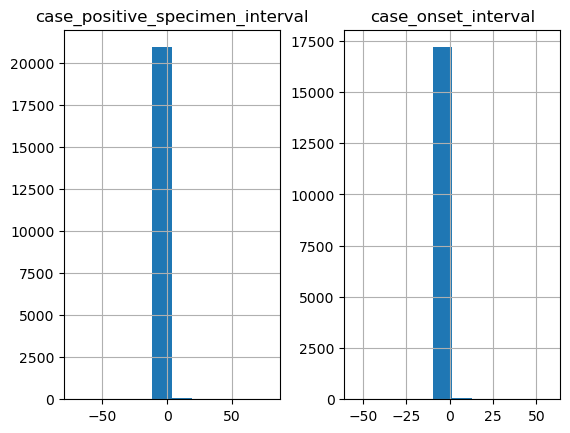

In [11]:
#Plot histograms and box plots for continuous features
df.hist().T

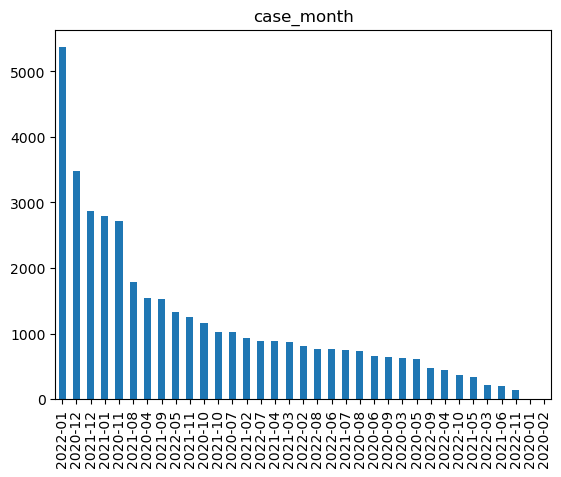

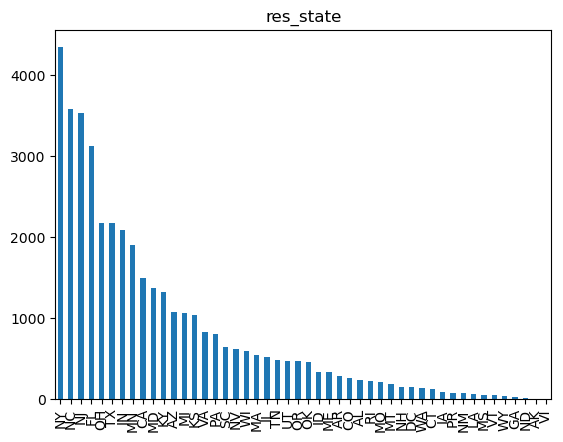

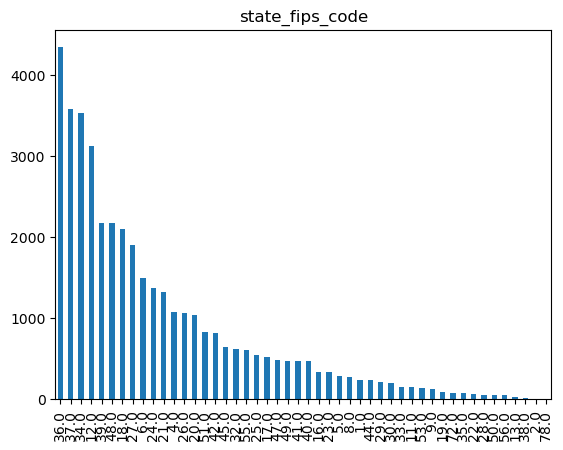

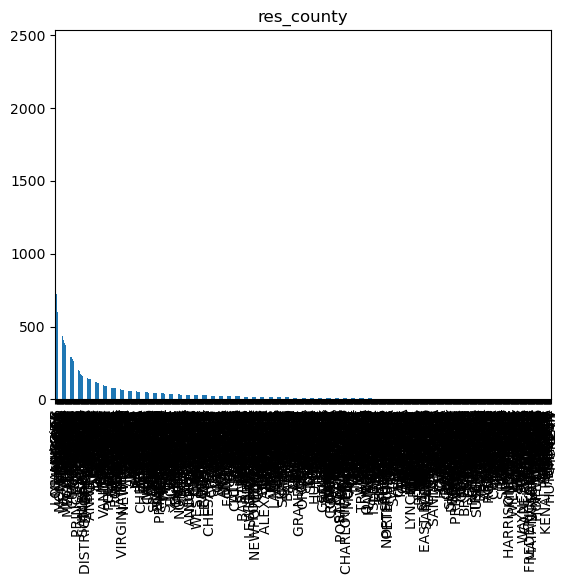

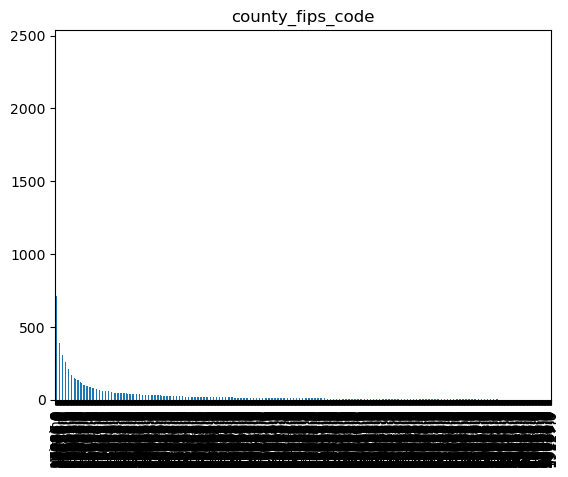

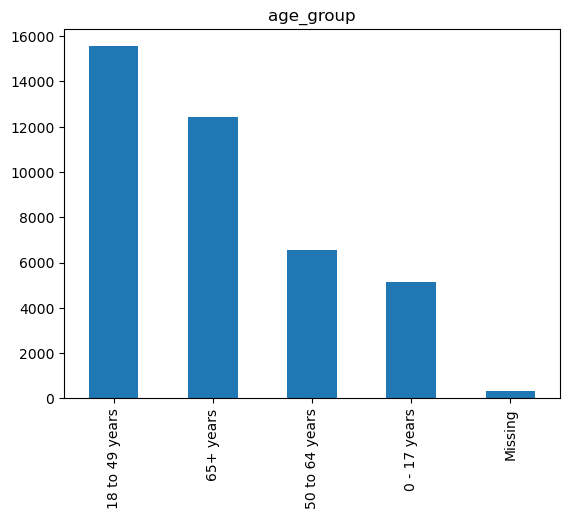

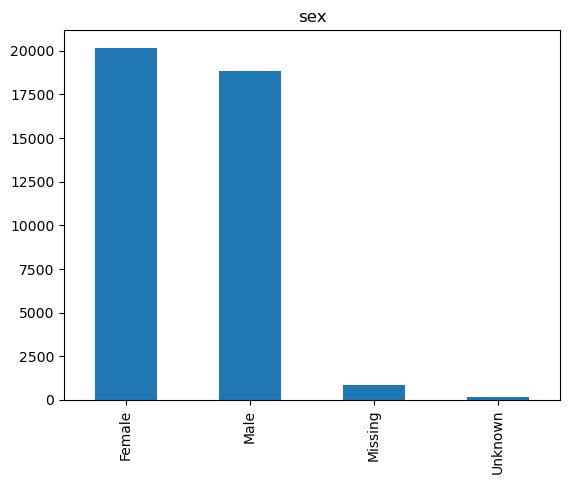

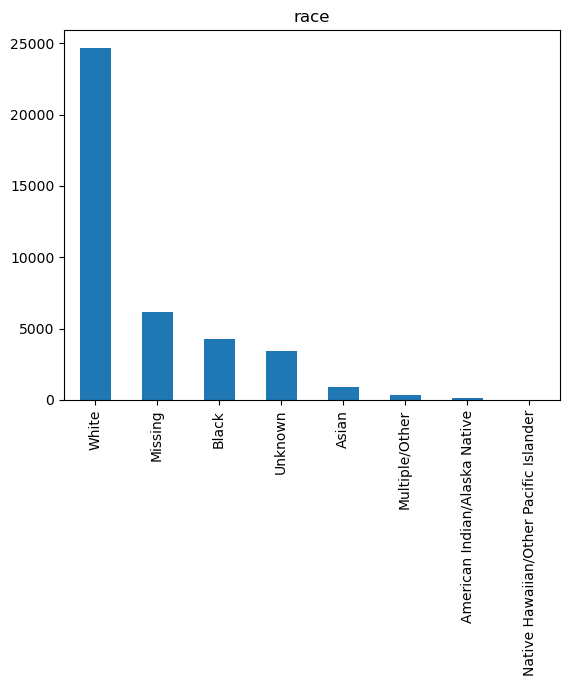

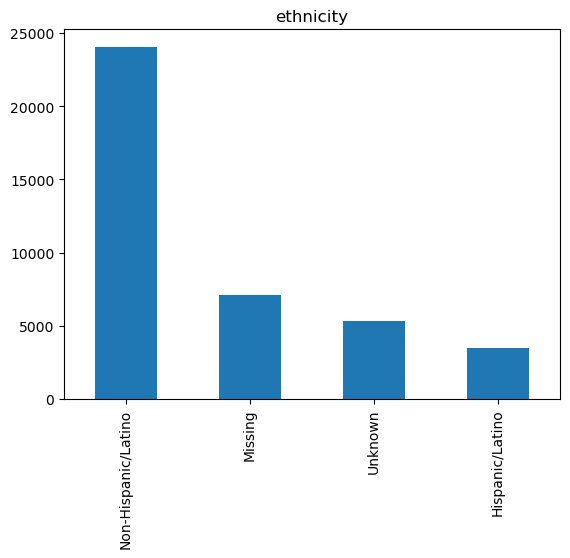

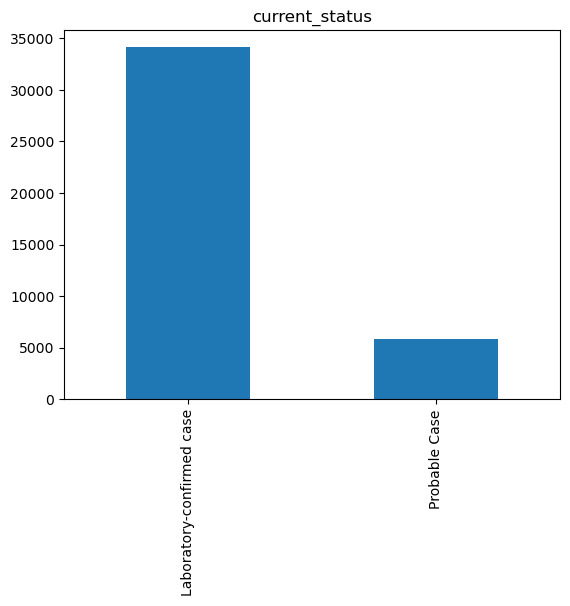

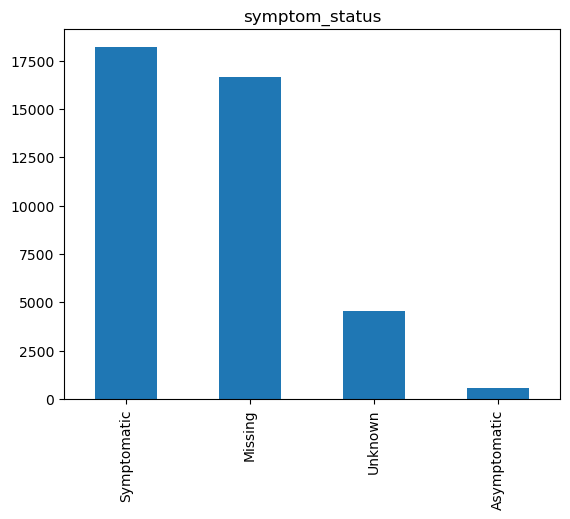

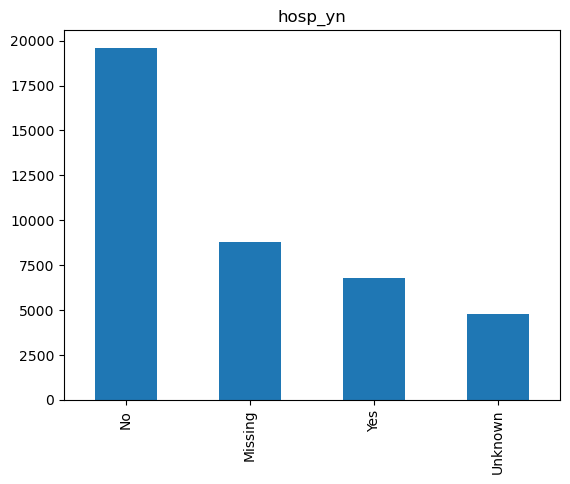

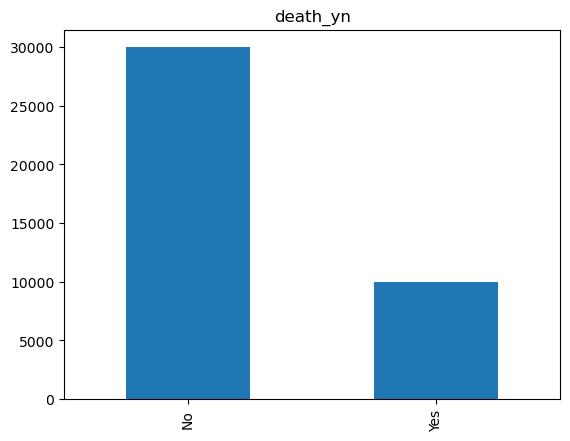

In [12]:
#Bar plots for categorical features
ls = ['case_month', 'res_state','state_fips_code', 'res_county','county_fips_code', 'age_group','sex','race','ethnicity','current_status','symptom_status','hosp_yn','death_yn']
for item in ls:
    df[item].value_counts(dropna=False).plot(kind='bar', title=item)
    plt.show()

In [19]:
#Remove or alter problem sections here

#Saves cleaned csv
df.to_csv('SAMPLE_DF_CHANGE_WHEN_MISSING_FEATURES_DECIDED.csv', index=False)

# Train Test Split

With some preliminary data cleaning taken care of, we can now conduct a train text split on the data to prepare it for future machine learning tasks. Once the data is split, we can plot 

In [18]:
#data for task 1
df = pd.read_csv('SAMPLE_DF_CHANGE_WHEN_MISSING_FEATURES_DECIDED.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)

#train test split on data
train, test = train_test_split(df, test_size = 0.3)

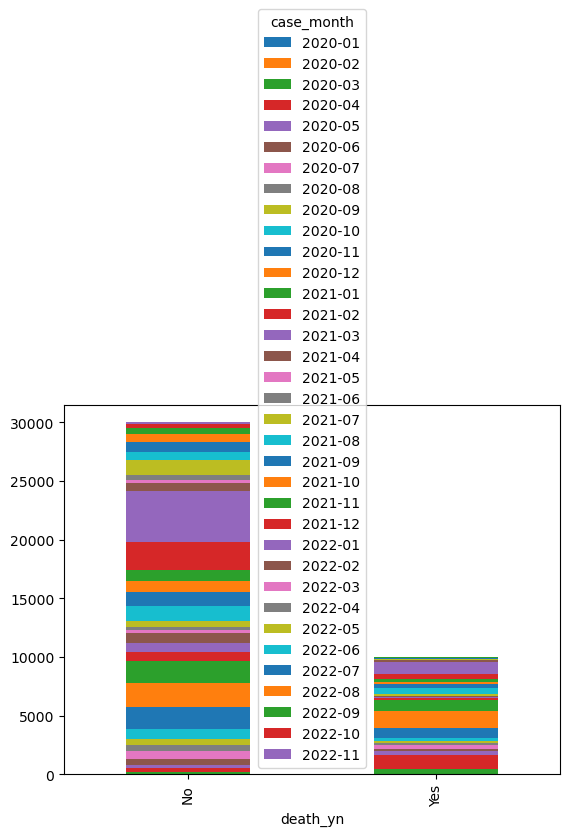

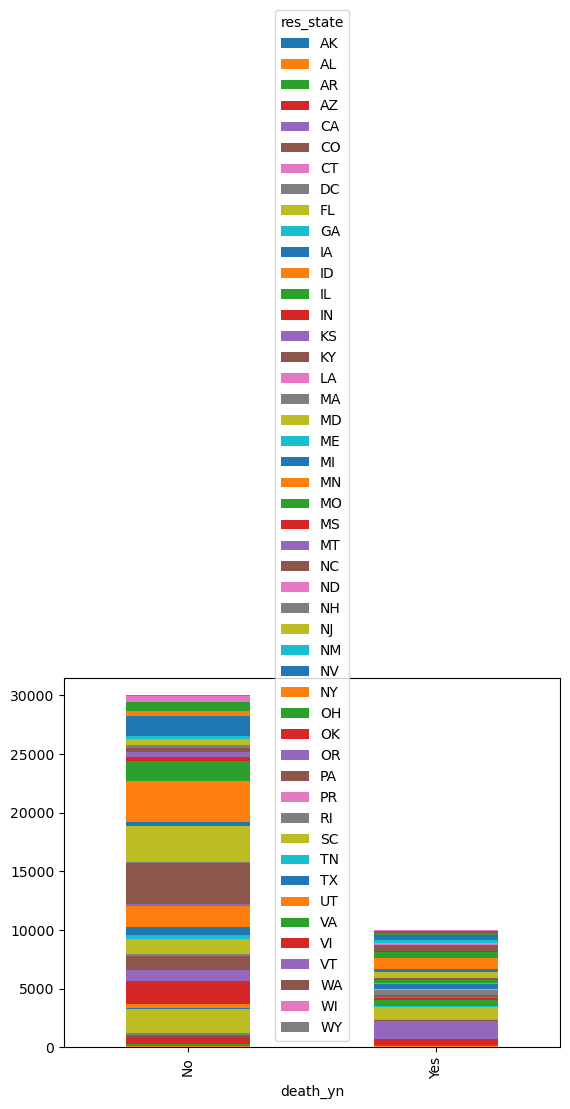

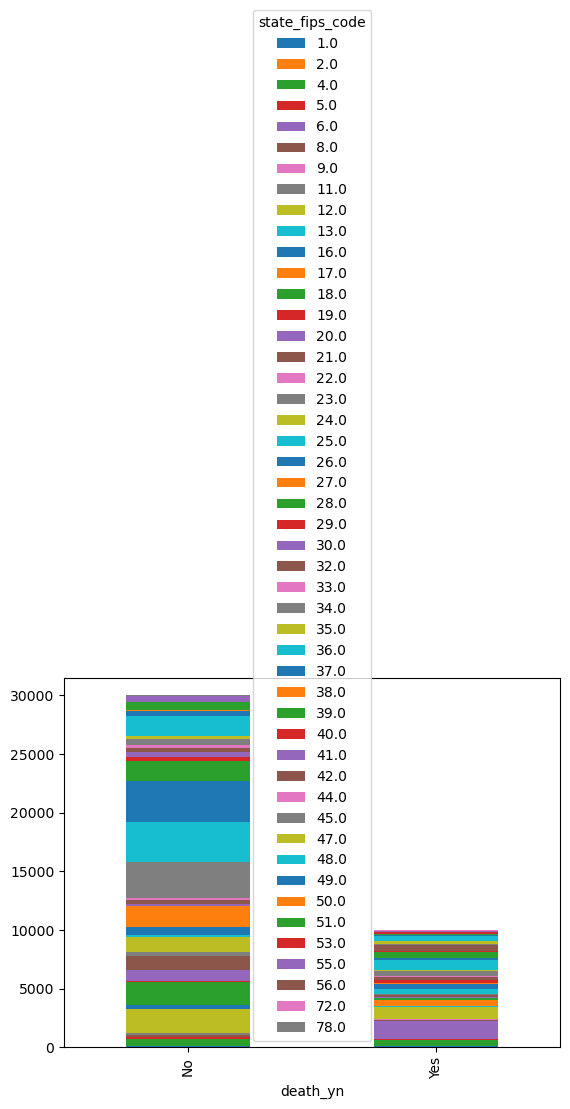

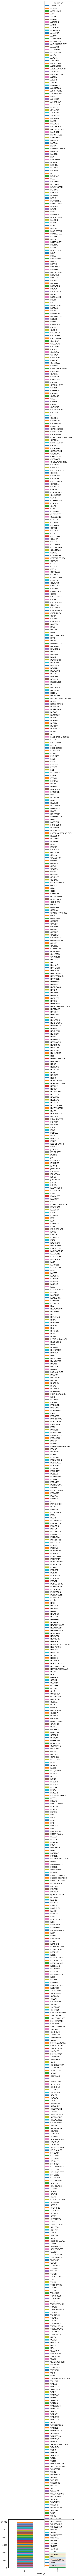

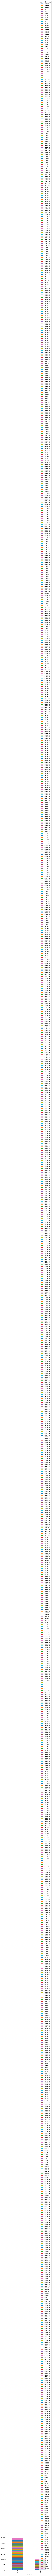

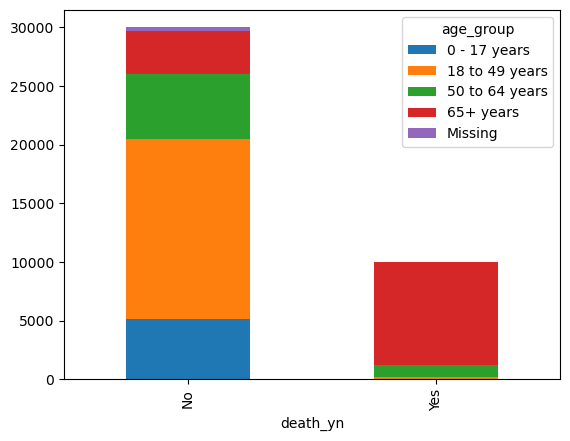

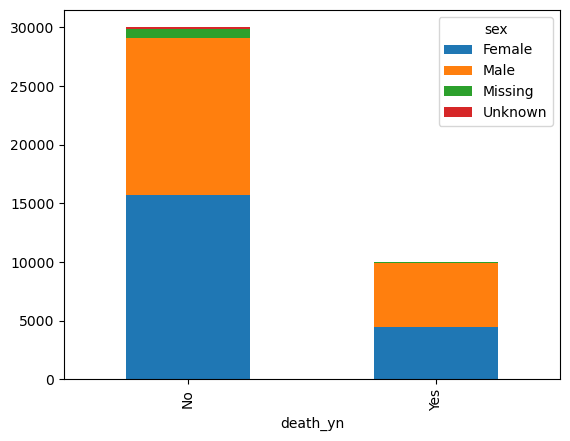

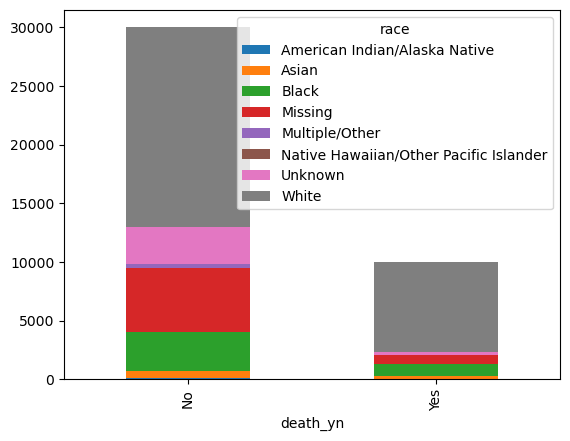

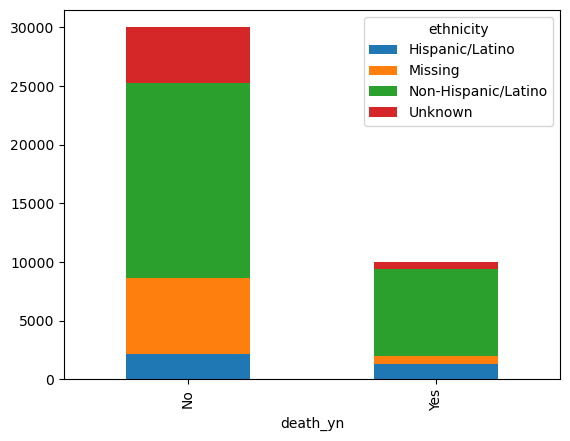

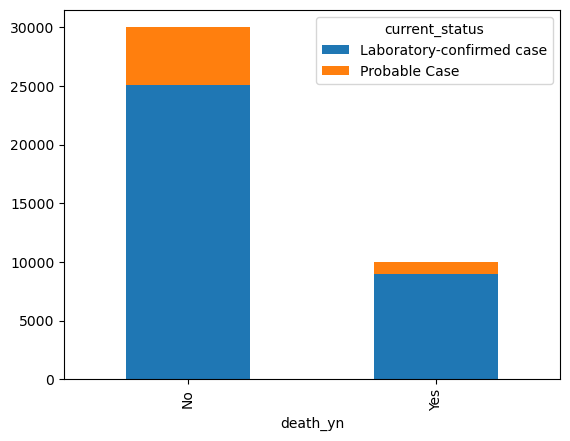

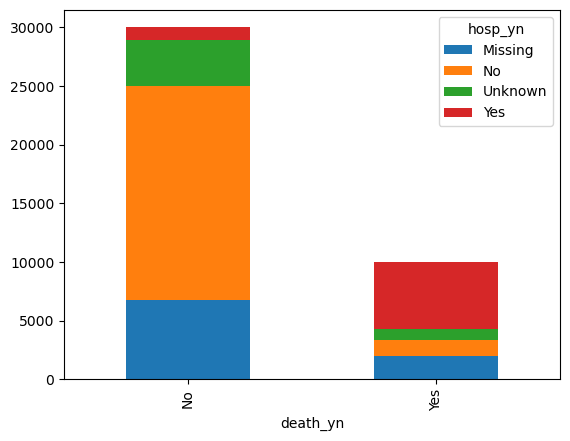

In [20]:
#Correlations between continuous features and target feature (death_yn)

ls = ['case_month', 'res_state','state_fips_code', 'res_county','county_fips_code', 'age_group','sex','race','ethnicity','current_status','hosp_yn']
for item in ls:
    df.groupby(['death_yn', item]).size().unstack().plot(kind='bar', stacked=True)

Discuss implications of continuous correlations here

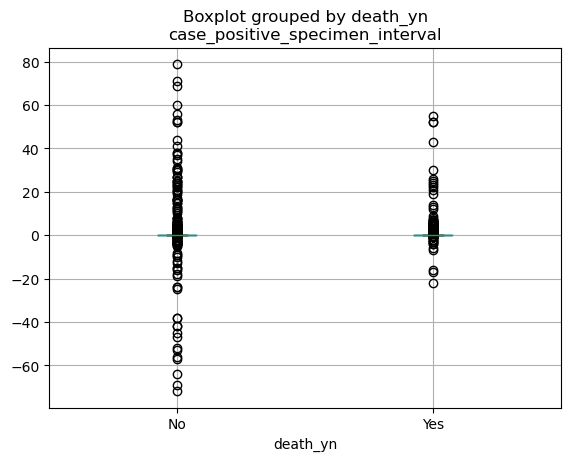

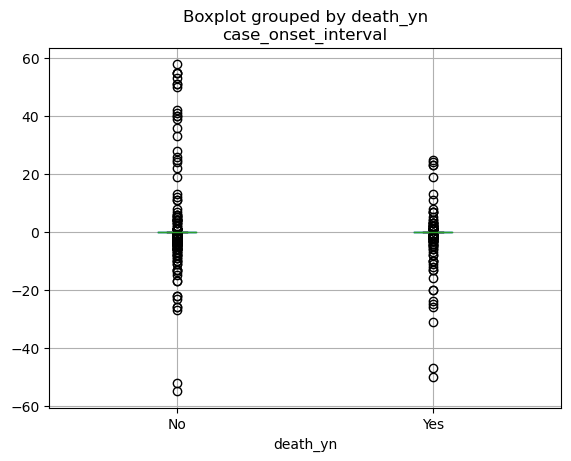

In [21]:
#Correlations between categorical features and target feature (death_yn)

ls = ['case_positive_specimen_interval', 'case_onset_interval']
for item in ls:
    df.boxplot(column=[item], by='death_yn')

Dicuss implications or categorical correlations here

# Task 2: Linear Regression

The aim of this task is to perform some basic predictive analysis on the data prepared in task one. To this end, a linear regression model will be created using the training data yielded by the train-test split from the previous task. The features to be analyzed in this section are (INSERT FEATURES HERE). The model will then be evaluated based on its performance using the training data, the test data, and other linear regression models trained on the full dataset. 